In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import seaborn as sns
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.regression.mixed_linear_model import MixedLM

# set the maximum number of rows and columns to display to unlimited
pd.set_option("display.max_rows", None, "display.max_columns", None) 

# Read in the data
data = pd.read_csv("C:/Users/Kiat Kai/Desktop/NOTES/FYP/Full Dataset/diamante_eligible_5June.csv")
data.drop(columns = ["Unnamed: 0"], inplace = True)
data.head()

ID_DIAMANTE date_baseline_visit  Start_Date  Study_Day Week_Day  \
0  DIAMANTE-125786          0019-10-21  22/10/2019          1      Tue   
1  DIAMANTE-125786          0019-10-21  23/10/2019          2      Wed   
2  DIAMANTE-125786          0019-10-21  24/10/2019          3      Thu   
3  DIAMANTE-125786          0019-10-21  25/10/2019          4      Fri   
4  DIAMANTE-125786          0019-10-21  26/10/2019          5      Sat   

   WeekDay_dummy  age  gender                        eth eth_other  \
0              1   18  Female  Asian or Pacific Islander       NaN   
1              1   18  Female  Asian or Pacific Islander       NaN   
2              1   18  Female  Asian or Pacific Islander       NaN   
3              1   18  Female  Asian or Pacific Islander       NaN   
4              0   18  Female  Asian or Pacific Islander       NaN   

                                edu employed basics_challenges_r  \
0  Some college or technical school    Other     Not hard at all   
1  Some college or technical school    Other     Not hard at all   
2  Some college or technical school    Other     Not hard at all   
3  Some college or technical school    Other     Not hard at all   
4  Some college or technical school    Other     Not hard at all   

  income_ladder marital_status  adults_household  child_household  \
0        Spot 5         Single                 2                0   
1        Spot 5         Single                 2                0   
2        Spot 5         Single                 2                0   
3        Spot 5         Single                 2                0   
4        Spot 5         Single                 2                0   

  nat_language      nat_lang_able born_us country years_us   health_lit  \
0       telugu  Very high ability      No   India     2005  Quite a bit   
1       telugu  Very high ability      No   India     2005  Quite a bit   
2       telugu  Very high ability      No   India     2005  Quite a bit   
3       telugu  Very high ability      No   India     2005  Quite a bit   
4       telugu  Very high ability      No   India     2005  Quite a bit   

  health_status      pain start_soc_active start_soc_months  start_ipaq_1  \
0     Very Good  Not sure               No               No             5   
1     Very Good  Not sure               No               No             5   
2     Very Good  Not sure               No               No             5   
3     Very Good  Not sure               No               No             5   
4     Very Good  Not sure               No               No             5   

   start_ipaq_2 start_ipaq_3  start_phq8_1  start_phq8_2  start_phq8_3  \
0            60          300             0             0             1   
1            60          300             0             0             1   
2            60          300             0             0             1   
3            60          300             0             0             1   
4            60          300             0             0             1   

   start_phq8_4  start_phq8_5  start_phq8_6  start_phq8_7  start_phq8_8  \
0             1             1             0             0             0   
1             1             1             0             0             0   
2             1             1             0             0             0   
3             1             1             0             0             0   
4             1             1             0             0             0   

         start_phq8_prd  start_gad_1  start_gad_2  start_gad_3  start_gad_4  \
0  Not difficult at all            0            0            0            0   
1  Not difficult at all            0            0            0            0   
2  Not difficult at all            0            0            0            0   
3  Not difficult at all            0            0            0            0   
4  Not difficult at all            0            0            0            0   

   start_gad_5  start_gad_6  sta

### Find out which variables in the data set contains null values

In [2]:
data.isnull().sum()

ID_DIAMANTE               0
date_baseline_visit       0
Start_Date                0
Study_Day                 0
Week_Day                  0
WeekDay_dummy             0
age                       0
gender                    0
eth                       0
eth_other              3680
edu                       0
employed                  0
basics_challenges_r       0
income_ladder            45
marital_status            0
adults_household          0
child_household           0
nat_language              0
nat_lang_able          2021
born_us                   0
country                2150
years_us               2195
health_lit                0
health_status             0
pain                      0
start_soc_active          0
start_soc_months          0
start_ipaq_1              0
start_ipaq_2              0
start_ipaq_3              0
start_phq8_1              0
start_phq8_2              0
start_phq8_3              0
start_phq8_4              0
start_phq8_5              0
start_phq8_6        

- Total of 121 columns, 3770 rows
- 29 columns has missing values
- Out of which, 4 variables: eth_other, nat_lang_able, country, years_us has more than 2000 missing values
    - eth_other has 90 objects, 3680 missing values
    - income_ladder has 3725 objects, 45 missing values
    - nat_lang_able has 1749 objects, 2021 missing values
    - country has 1620 objects, 2150 missing values
    - years_us has 1575 objects, 2195 missing values
    - start_phq8_prd has 3725 objects, 25 missing values
    - start_gad_prd has 3680 objects, 90 missing values
    - time_msg has 2942 objects, 828 missing values
    - days.since.F0 has 3165 objects, 605 missing values
    - days.since.F1 has 3155 objects, 615 missing values
    - days.since.F2 has 3152 objects, 648 missing values
    - days.since.F3 has 3134 objects, 636 missing values
    - days.since.F4 has 3224 objects, 546 missing values
    - days.since.M0 has 3066 objects, 704 missing values
    - days.since.M1 has 3190 objects, 580 missing values
    - days.since.M2 has 3267 objects, 503 missing values
    - days.since.M3 has 3294 objects, 476 missing values
    - days.since.T1 has 3274 objects, 496 missing values
    - days.since.T2 has 3275 objects, 495 missing values
    - days.since.T3 has 3250 objects, 520 missing values
    - days.since.T4 has 3242 objects, 528 missing values
    - days.since.ind has 3199 objects, 571 missing values
    - days.since.soc has 3097 objects, 673 missing values
    - yesterday_progess has 3412 objects, 358 missing values
    - yesterday_steps has 3248 objects, 522 missing values
    - today_steps has 3210 objects, 560 missing values
    - daybefyest_steps has 3196 objects, 574 missing values
    - step_change_yest has 3055 objects, 715 missing values
    - step_change_today has 3095 objects, 675 missing values 

#### Table 1 Summary statistics of DIAMANTE student dataset (N = 84)

|Variable|Mean|sd|
|:-:|:-:|:-:|
|age of participants:|20|2.32|
|today steps:|8727.04|4354.87|
|daily goal:|9464.59|2190.47|
|weekly goal:|18929.18|4280.95|


- All participants have a entire study duration of 45 days except 
    - ID_DIAMANTE-360755 who has 44 days
    - ID_DIAMANTE-599252 who has 44 days
    - ID_DIAMANTE-735954 who has 44 days
    - ID_DIAMANTE-744804 who has 44 days
    - ID_DIAMANTE-770669 who has 44 days
    - ID_DIAMANTE-802243 who has 44 days
    - ID_DIAMANTE-946802 who has 41 days

### We cleaned the data and used the new dataset: data_dropnan2 from now onwards

In [3]:
# We want to keep time_msg but it has 828 missing values as the participants did not receive any message at all
# So to keep it, we replace the time_msg NA with T0

data["time_msg"] = data["time_msg"].replace(np.nan, "T0")

# We now try to drop columns with missing values at all
data_dropnan = data.drop(["eth_other","income_ladder","nat_lang_able","country","years_us","start_phq8_prd",
                          "start_gad_prd","days.since.F0","days.since.F1","days.since.F2","days.since.F3","days.since.F4"
                          ,"days.since.M0","days.since.M1","days.since.M2","days.since.M3","days.since.T1","days.since.T2",
                          "days.since.T3","days.since.T4","days.since.ind","days.since.soc","weekly_goal","yesterday_progress",
                          "week_progress","daybefyest_steps",
                         "step_change_yest","step_change_today"], axis=1)

# Now remove the rows with missing today_steps
data_dropnan.dropna(axis=0, inplace=True)

# Removed the outlier from today steps
data_dropnan = data_dropnan[data_dropnan.today_steps < 50000]

# Create a new variable called difference_from_yesterday_steps
data_dropnan["difference_from_yesterday_steps"] = data_dropnan["today_steps"] - data_dropnan["yesterday_steps"]

# VARIABLE: timemsg
data_dropnan1 = data_dropnan.drop(data_dropnan[data_dropnan.time_msg == "2+ Time Frames"].index, axis = 0)

# Next, we remove some rows for some columns which has outliers
# VARIABLE: ETH
data_dropnan1 = data_dropnan1.drop(data_dropnan1[data_dropnan1.eth =="Asian or Pacific Islander,Hispanic/Latino(a)"].index, axis = 0)
data_dropnan1 = data_dropnan1.drop(data_dropnan1[data_dropnan1.eth =="Asian or Pacific Islander,White or Caucasian,Multi-ethnic"].index, axis = 0)
data_dropnan1 = data_dropnan1.drop(data_dropnan1[data_dropnan1.eth =="Asian or Pacific Islander,White or Caucasian"].index, axis = 0)
data_dropnan1 = data_dropnan1.drop(data_dropnan1[data_dropnan1.eth =="White or Caucasian,Hispanic/Latino(a),Multi-ethnic"].index, axis = 0)
data_dropnan1 = data_dropnan1.drop(data_dropnan1[data_dropnan1.eth =="White or Caucasian,Hispanic/Latino(a),Other"].index, axis = 0)
data_dropnan1 = data_dropnan1.drop(data_dropnan1[data_dropnan1.eth =="White or Caucasian,Other"].index, axis = 0)
data_dropnan1 = data_dropnan1.drop(data_dropnan1[data_dropnan1.eth =="Black or African American,Hispanic/Latino(a)"].index, axis = 0)

# VARIABLE: gender
data_dropnan1 = data_dropnan1.drop(data_dropnan1[data_dropnan1.gender == "Other or Not Listed; Please Specify:"].index, axis = 0)

# Next, I also drop columns that I think MAY NOT BE USEFUL for our analysis
data_dropnan1 = data_dropnan1.drop(["Fcorrection","Mcorrection","individual","Start_Date",
                                   "date_baseline_visit","prediction","nat_language"] ,axis=1)

# We try to remove all those health questionaire (multiple columns kind)
data_dropnan2 = data_dropnan1.drop(["start_soc_active","start_soc_months","start_ipaq_1","start_ipaq_2","start_ipaq_3",
                                   "start_phq8_1","start_phq8_2","start_phq8_3","start_phq8_4","start_phq8_5","start_phq8_6",
                                   "start_phq8_7","start_phq8_8","start_gad_1","start_gad_2","start_gad_3",
                                   "start_gad_4","start_gad_5","start_gad_6","start_gad_7","start_bads_1r_1",
                                   "start_bads_2_1","start_bads_3_1","start_bads_4_1","start_bads_5_1","start_bads_6r_1",
                                   "start_bads_7r_1","start_bads_8r_1","start_bads_9_1","start_leids_1","start_leids_1",
                                   "start_leids_2","start_leids_3","start_leids_4","start_leids_5","start_leids_6",
                                    "loneliness_1","loneliness_2","loneliness_3","neighborhood_1","neighborhood_2",
                                   "neighborhood_3","neighborhood_4r","neighborhood_5","neighborhood_6","week_steps"]
                                   , axis = 1)

print(data_dropnan2.shape)
print(data_dropnan2.isnull().sum())
print(len(data.groupby(["ID_DIAMANTE"])))
# There are 84 participants in this study

(2832, 42)
ID_DIAMANTE                        0
Study_Day                          0
Week_Day                           0
WeekDay_dummy                      0
age                                0
gender                             0
eth                                0
edu                                0
employed                           0
basics_challenges_r                0
marital_status                     0
adults_household                   0
child_household                    0
born_us                            0
health_lit                         0
health_status                      0
pain                               0
social_phone                       0
social_meet                        0
social_rel                         0
sms_contact                        0
text_freq                          0
smartphonetype                     0
phq_sumnew                         0
GAD_sum                            0
leids_sum                          0
BADS_sum                   

### Histogram of variable: daily_goal

[10700 11500  8000 11800  8700 10900  9100 14300 10000  9000  9900  8300
 14600 12800 12600 11200 18800 10100  8200  9800 12200 17500 11000  9400
 13300 10500  8600 10400  9300  8800  8100 11300  8500]


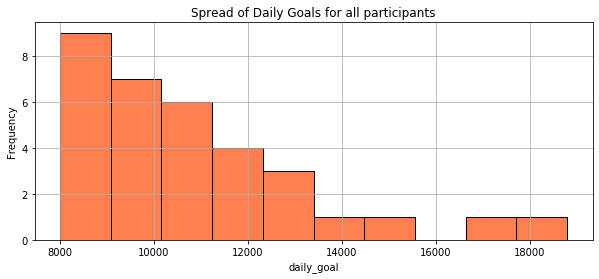

In [4]:
data_daily_goal = data_dropnan2.daily_goal.unique() # Here we are using unique values instead of plotting the whole spread
print(data_daily_goal)
plt.figure(figsize = (10,4))
plt.hist(data_daily_goal, bins = 10, color = "coral", ec='black')
plt.title("Spread of Daily Goals for all participants")
plt.xlabel("daily_goal")
plt.ylabel("Frequency")
plt.grid()

### Distribution of today_steps of the original data

[11570. 11763.  8977. ...  1548.  1393.  8219.]


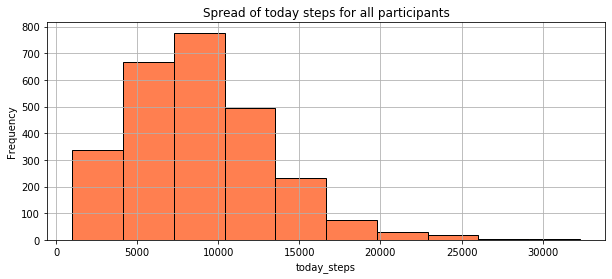

In [5]:
data_daily_goal = data_dropnan2.today_steps.unique() # Here we are using unique values instead of plotting the whole spread
print(data_daily_goal)
plt.figure(figsize = (10,4))
plt.hist(data_daily_goal, bins = 10, color = "coral", ec='black')
plt.title("Spread of today steps for all participants")
plt.xlabel("today_steps")
plt.ylabel("Frequency")
plt.grid()

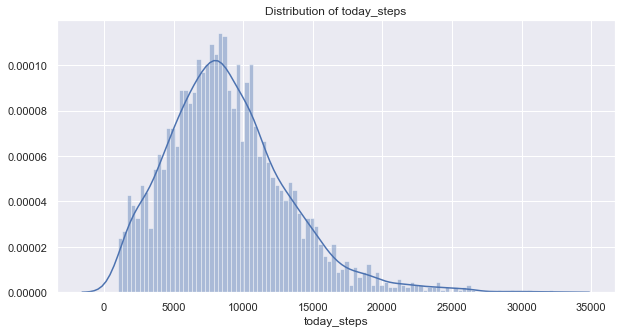

In [6]:
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(data_dropnan2['today_steps'], bins = 100)
plt.title("Distribution of today_steps")
plt.show()

### Correlation between numerical variables in the dataset: data_dropnan2

(16.0, 0.0)

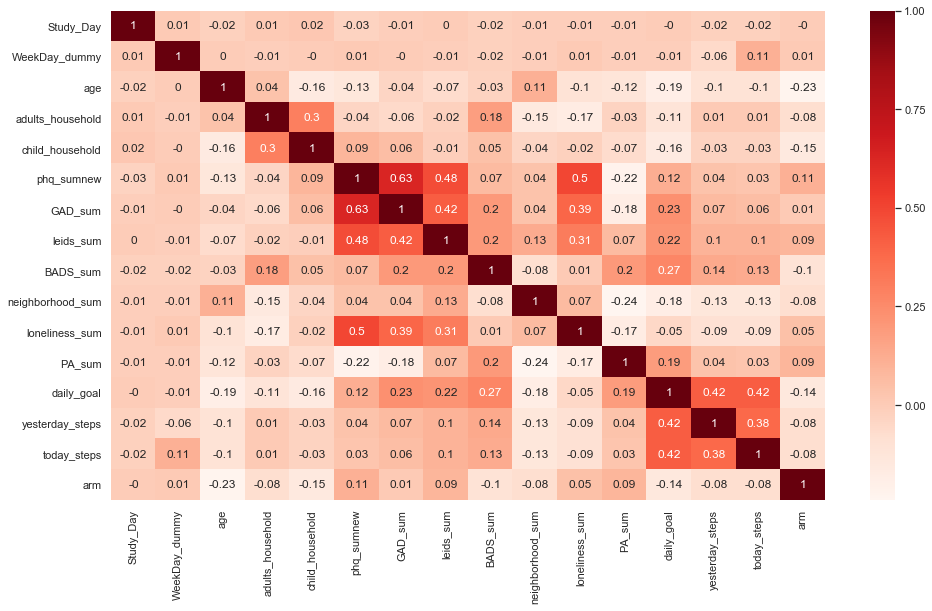

In [7]:
# Correlation between numerical variables in the data set
data_dropnan2_corr = data_dropnan2.drop(["difference_from_yesterday_steps"],axis=1)
correlation_matrix = data_dropnan2_corr.corr().round(2)

sns.set(rc={'figure.figsize':(16,9)})
ax = sns.heatmap(data=correlation_matrix, annot=True, cmap = "Reds")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Plotting the variables: today_steps and daily_goal for each individual participants

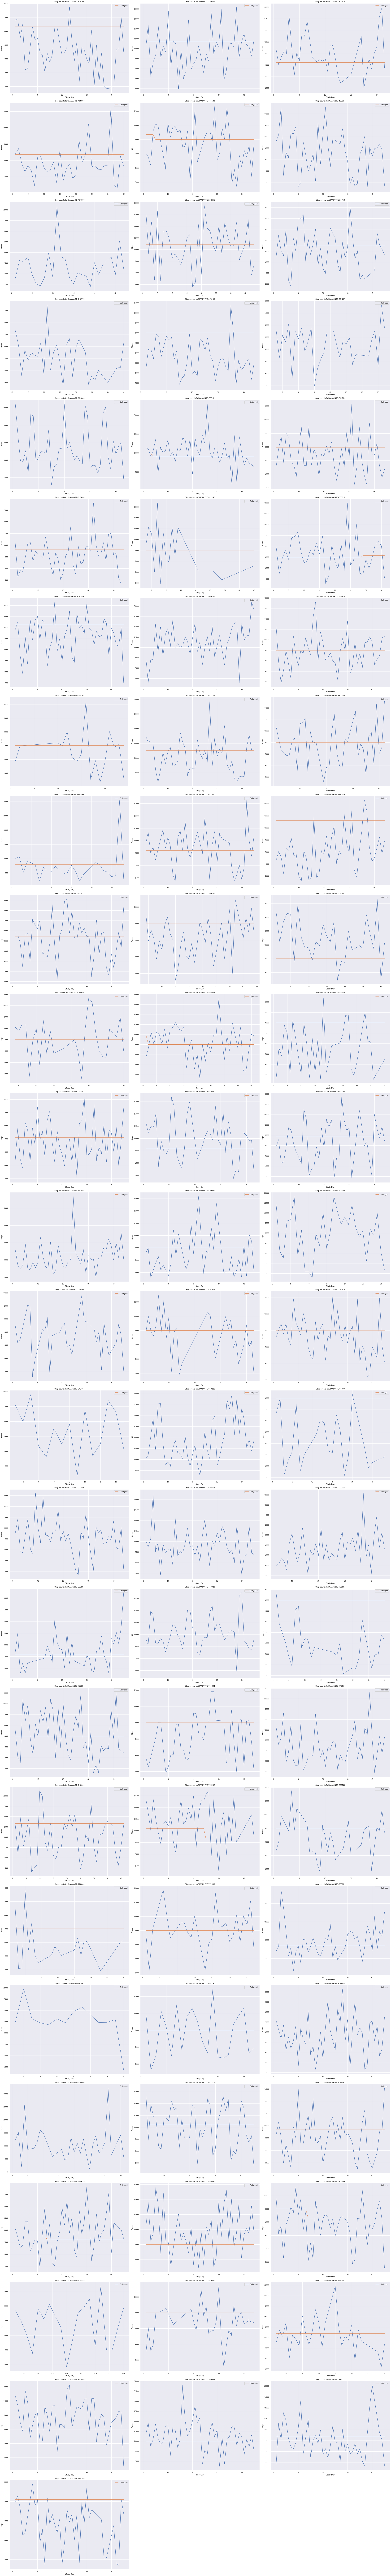

In [8]:
participants = data_dropnan2.ID_DIAMANTE.unique() # 84 participants with different id

plt.figure(figsize = (34,240))
subplot = 1
for i in participants:
    plt.subplot(28,3,subplot)
    plt.plot(data_dropnan2[data_dropnan2["ID_DIAMANTE"] == i].loc[:,"Study_Day"], data_dropnan2[data_dropnan2["ID_DIAMANTE"] == i].loc[:,"today_steps"])
    plt.plot(data_dropnan2[data_dropnan2["ID_DIAMANTE"] == i].loc[:,"Study_Day"], data_dropnan2[data_dropnan2["ID_DIAMANTE"] == i].loc[:,"daily_goal"]
             , label = "Daily goal")
    plt.title("Step counts for" + str(i))
    plt.xlabel("Study Day")
    plt.ylabel("Steps")
    subplot += 1
    plt.legend()
    
plt.tight_layout()
plt.show()

### Distribution of the number of days a participants' steps hit their daily goals throughout their 45 days duration

Text(0.5, 1.0, 'Number of days participant reached daily steps goal')

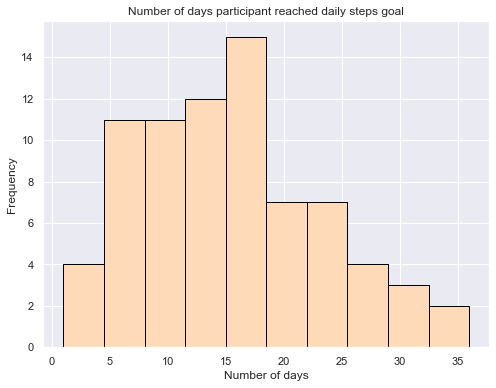

In [9]:
# Create a new column called target_hit, if a participant hit their daily step goals, 1 if hit, 0 if didn't hit
plt.figure(figsize = (8,6))
data_dropnan2['target_hit'] = np.where(data_dropnan2.today_steps >= data_dropnan2.daily_goal, 1, 0)
data_dropnan2.groupby(["ID_DIAMANTE"]).target_hit.sum().plot(kind="hist", ec = "black", color = "peachpuff")
plt.xlabel("Number of days")
plt.title("Number of days participant reached daily steps goal")

### Descriptive analysis of some the variables

Text(0.5, 1.0, 'Distribution of income ladder')

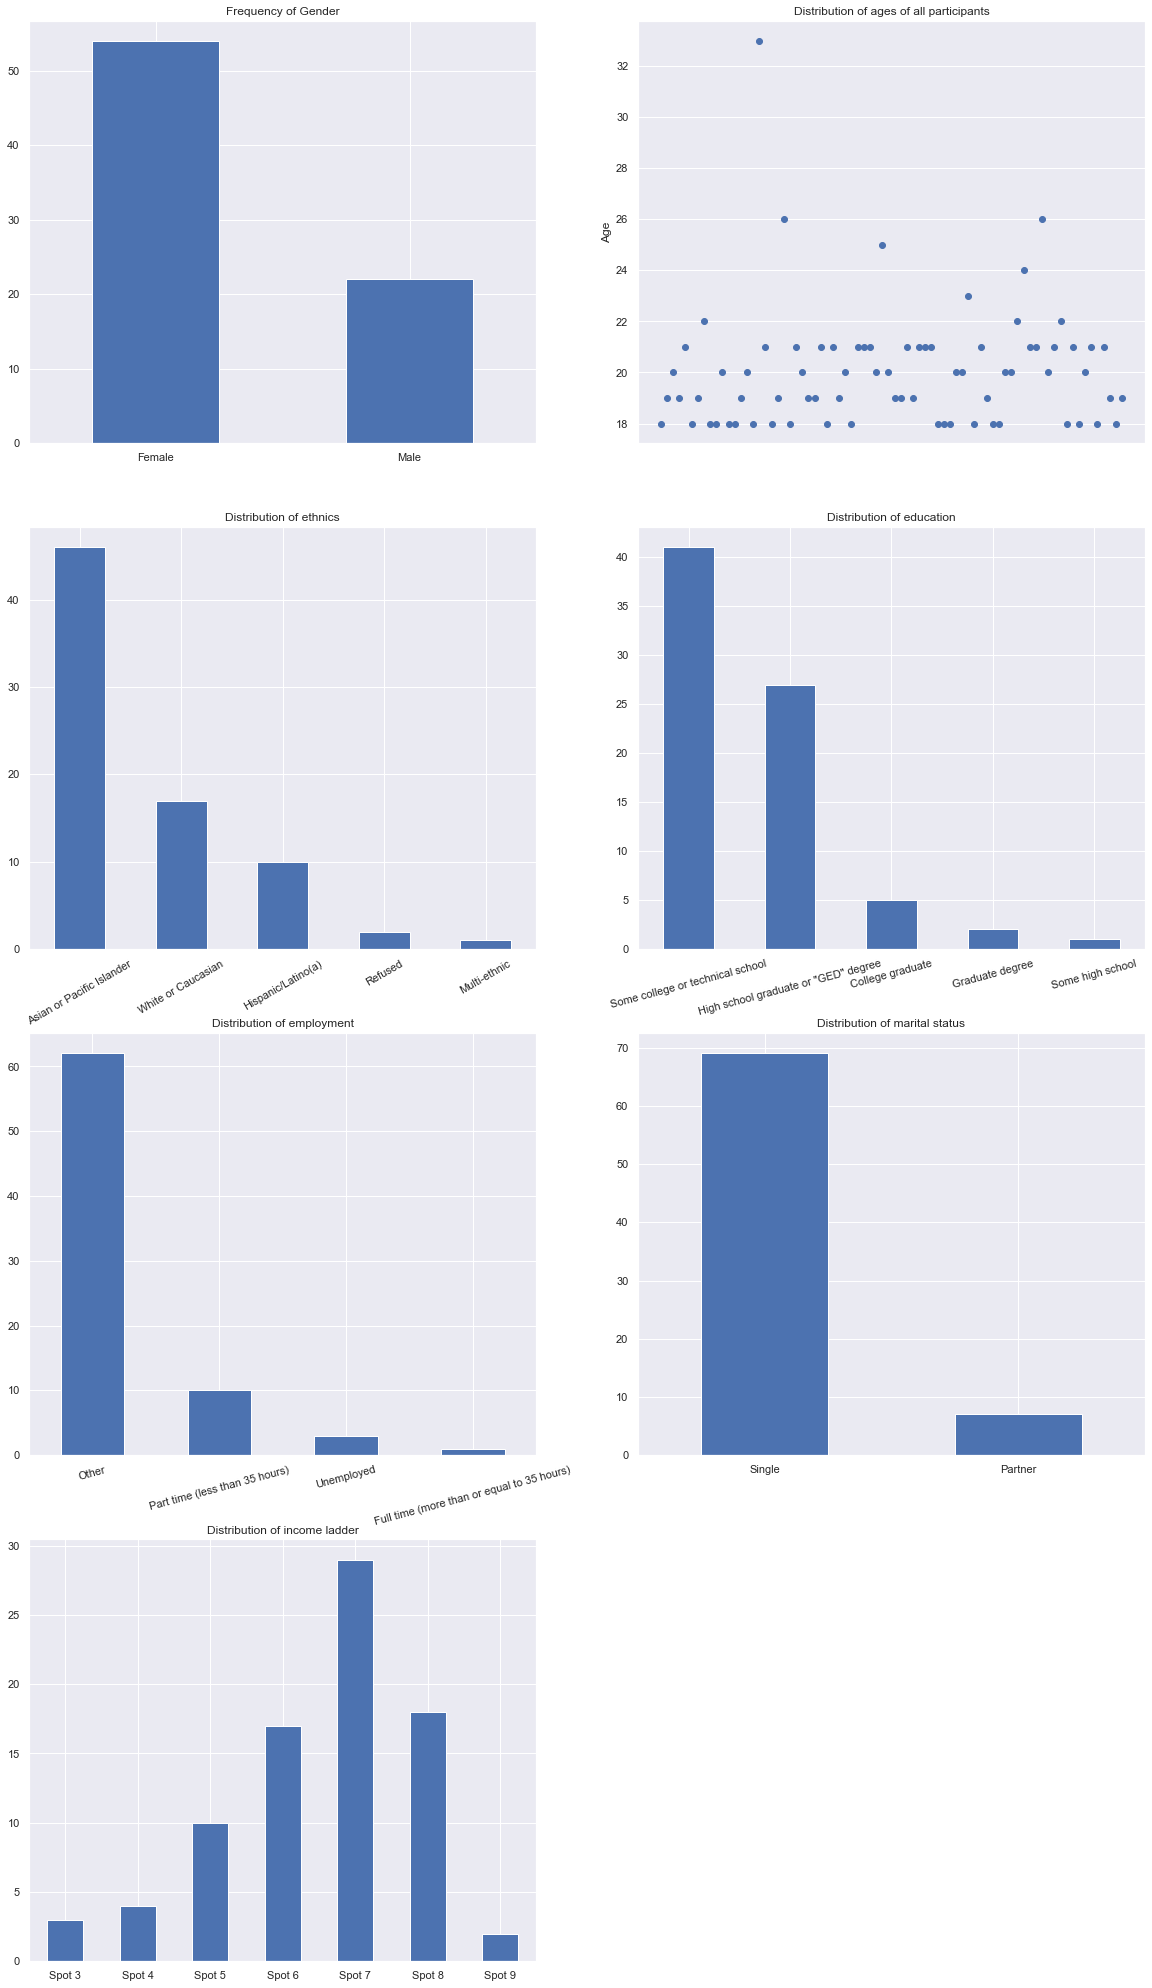

In [10]:
plt.figure(figsize = (20,45))
n = 5

plt.subplot(n,2,1)
### Barchart of gender in the study
df_gender = data_dropnan2.groupby(["ID_DIAMANTE"]).gender.describe()
# list(df_gender.columns.values)
df_gender.top.value_counts().plot(kind = 'bar', rot = 0, title = "Frequency of Gender")

plt.subplot(n,2,2)
### Scatterplot of age in the study
df_age = data_dropnan2.groupby(["ID_DIAMANTE"]).age.describe()
plt.scatter(participants, df_age['max'])
plt.xticks([]) # remove xlabel
plt.ylabel("Age")
plt.title("Distribution of ages of all participants")

plt.subplot(n,2,3)
### Barchart for eth (ethnics)
df_eth = data_dropnan2.groupby(["ID_DIAMANTE"]).eth.describe()
df_eth.top.value_counts().plot(kind = "bar", rot = 30)
plt.title("Distribution of ethnics")

plt.subplot(n,2,4)
### Barchart for edu (education)
df_edu = data_dropnan2.groupby(["ID_DIAMANTE"]).edu.describe()
df_edu.top.value_counts().plot(kind = "bar", rot=15)
plt.title("Distribution of education")

plt.subplot(n,2,5)
### Barchart for employed
df_employed = data_dropnan2.groupby(["ID_DIAMANTE"]).employed.describe()
df_employed.top.value_counts().plot(kind = "bar", rot = 15)
plt.title("Distribution of employment")

plt.subplot(n,2,6)
### Barchart for marital status
df_marital_status = data_dropnan2.groupby(["ID_DIAMANTE"]).marital_status.describe()
df_marital_status.top.value_counts().plot(kind = "bar", rot = 0)
plt.title("Distribution of marital status")

plt.subplot(n,2,7)
### Barchart for income ladder
df_income_ladder = data.groupby(["ID_DIAMANTE"]).income_ladder.describe() 
df_income_ladder.top.value_counts().sort_index().plot(kind = "bar", rot = 0)
plt.title("Distribution of income ladder")


Text(0.5, 1.0, 'Distribution of health status')

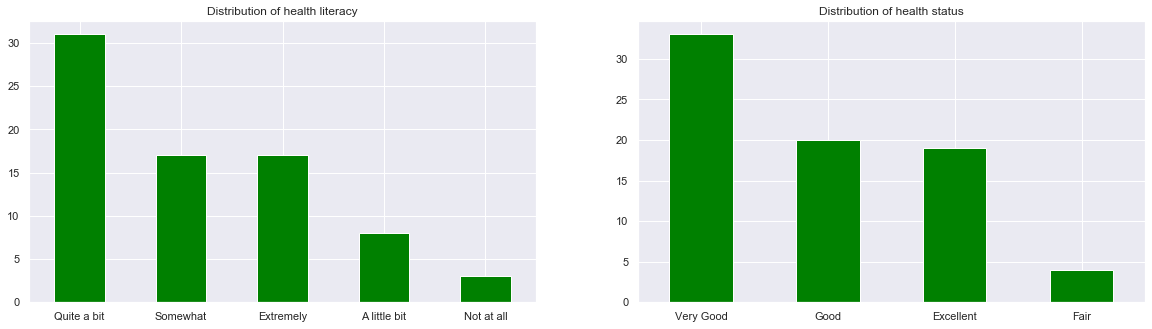

In [11]:
plt.figure(figsize=(20,30))
n = 5

plt.subplot(n,2,1)
### Barchart for health_lit
df_health_lit = data_dropnan2.groupby(["ID_DIAMANTE"]).health_lit.describe()
df_health_lit.top.value_counts().plot(kind = "bar", rot = 0, color = "green")
plt.title("Distribution of health literacy")

plt.subplot(n,2,2)
### Barchart for health status
df_health_status = data_dropnan2.groupby(["ID_DIAMANTE"]).health_status.describe()
df_health_status.top.value_counts().plot(kind = "bar", rot = 0, color = "green")
plt.title("Distribution of health status")


Text(0.5, 1.0, 'Distribution of text frequency')

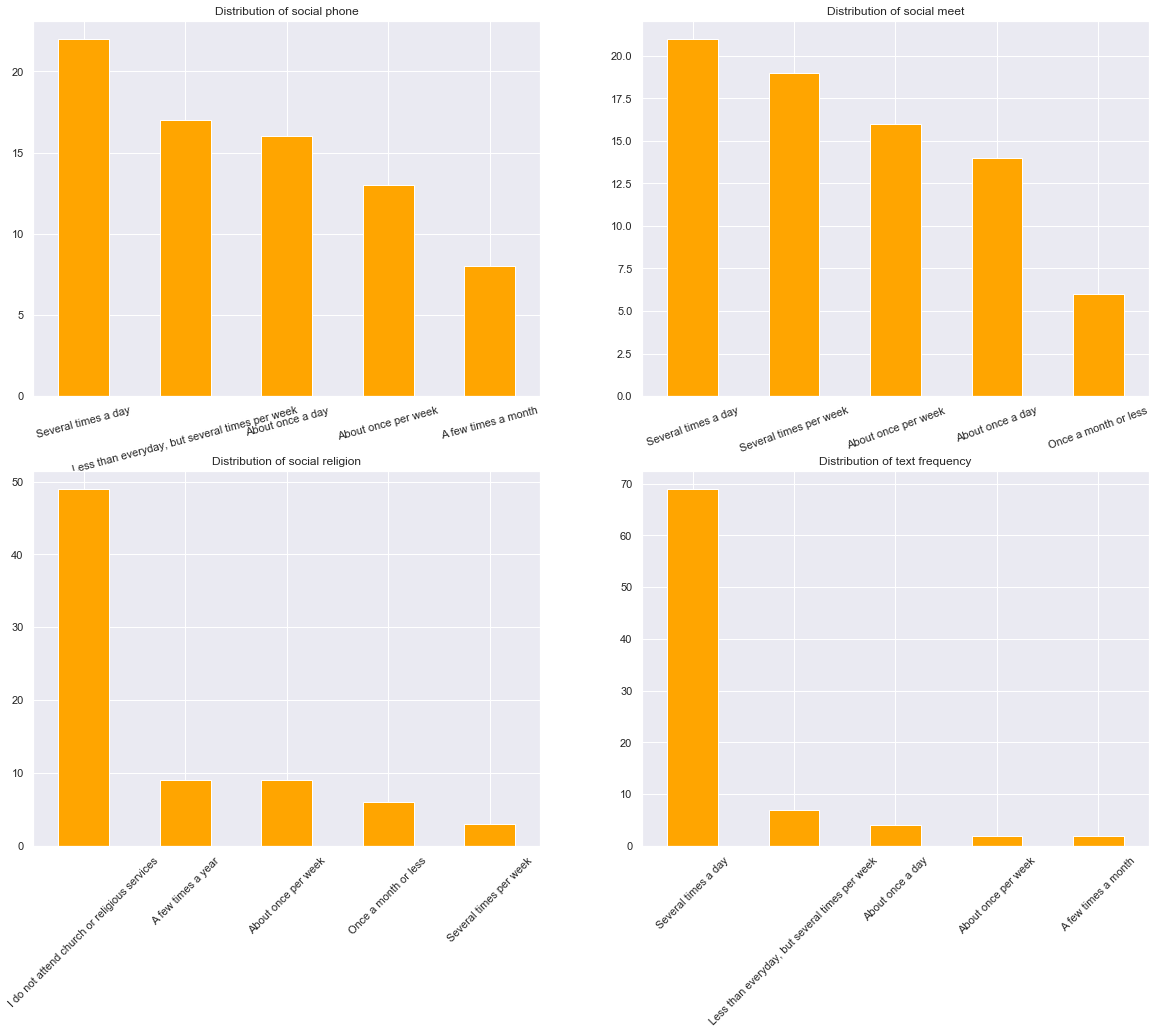

In [12]:
plt.figure(figsize=(20,40))
n = 5

plt.subplot(n,2,1)
### Barchart for social phone
df_social_phone = data_dropnan2.groupby(["ID_DIAMANTE"]).social_phone.describe()
df_social_phone.top.value_counts().plot(kind = "bar", rot = 15, color = "orange")
plt.title("Distribution of social phone")

plt.subplot(n,2,2)
### Barchart for social meet
df_social_meet = data_dropnan2.groupby(["ID_DIAMANTE"]).social_meet.describe()
df_social_meet.top.value_counts().plot(kind = "bar", rot = 20, color = "orange")
plt.title("Distribution of social meet")

plt.subplot(n,2,3)
### Barchart for social_rel (religion)
df_social_rel = data_dropnan2.groupby(["ID_DIAMANTE"]).social_rel.describe()
df_social_rel.top.value_counts().plot(kind = "bar", rot = 45, color = "orange")
plt.title("Distribution of social religion")

plt.subplot(n,2,4)
### Barchart for text_freq
df_text_freq = data.groupby(["ID_DIAMANTE"]).text_freq.describe()
df_text_freq.top.value_counts().plot(kind = "bar", rot = 45, color = "orange")
plt.title("Distribution of text frequency")

### GAD_sum, leids_sum, BADS_sum, neighborhood_sum, loneliness_sum for participants

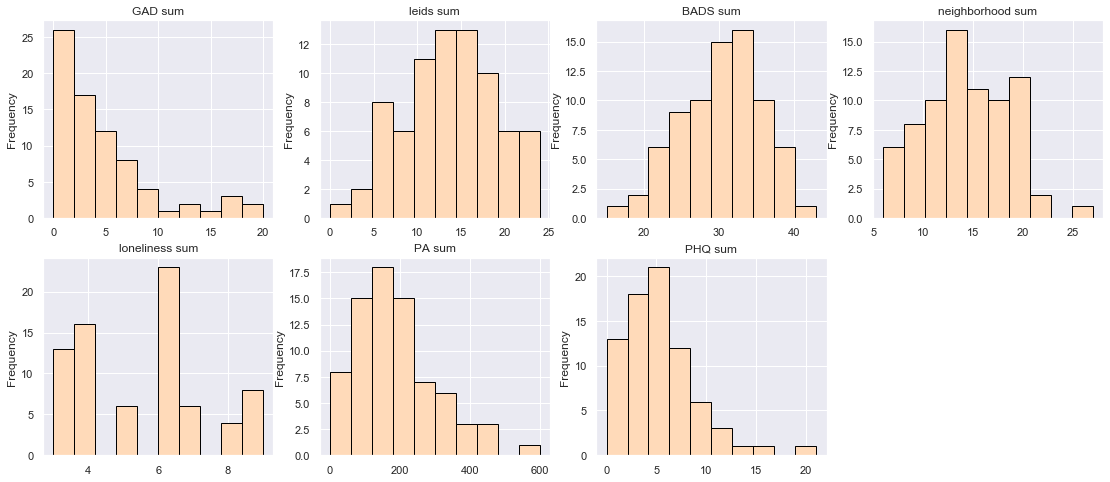

In [13]:
df_GAD_sum = data_dropnan2.groupby(["ID_DIAMANTE"]).describe().GAD_sum['max']
df_leids_sum = data_dropnan2.groupby(["ID_DIAMANTE"]).describe().leids_sum['max']
df_BADS_sum = data_dropnan2.groupby(["ID_DIAMANTE"]).describe().BADS_sum['max']
df_neighorbood_sum = data_dropnan2.groupby(["ID_DIAMANTE"]).describe().neighborhood_sum['max']
df_loneliness_sum = data_dropnan2.groupby(["ID_DIAMANTE"]).describe().loneliness_sum['max']
df_PA_sum = data_dropnan2.groupby(["ID_DIAMANTE"]).describe().PA_sum['max']
df_PHQ_sum = data_dropnan2.groupby(["ID_DIAMANTE"]).describe().phq_sumnew['max']

plt.figure(figsize = (19,8))

plt.subplot(2,4,1)
df_GAD_sum.plot(kind="hist", ec="black", color="peachpuff")
plt.title("GAD sum")

plt.subplot(2,4,2)
df_leids_sum.plot(kind="hist", ec="black", color="peachpuff")
plt.title("leids sum")

plt.subplot(2,4,3)
df_BADS_sum.plot(kind="hist", ec="black", color="peachpuff")
plt.title("BADS sum")

plt.subplot(2,4,4)
df_neighorbood_sum.plot(kind="hist", ec="black", color="peachpuff")
plt.title("neighborhood sum")

plt.subplot(2,4,5)
df_loneliness_sum.plot(kind="hist", ec="black", color="peachpuff")
plt.title("loneliness sum")

plt.subplot(2,4,6)
df_PA_sum.plot(kind="hist", ec="black", color="peachpuff")
plt.title("PA sum")

plt.subplot(2,4,7)
df_PHQ_sum.plot(kind="hist", ec="black", color="peachpuff")
plt.title("PHQ sum")

plt.tight_layout
plt.show()

Text(0.5, 1.0, 'Category for loneliness')

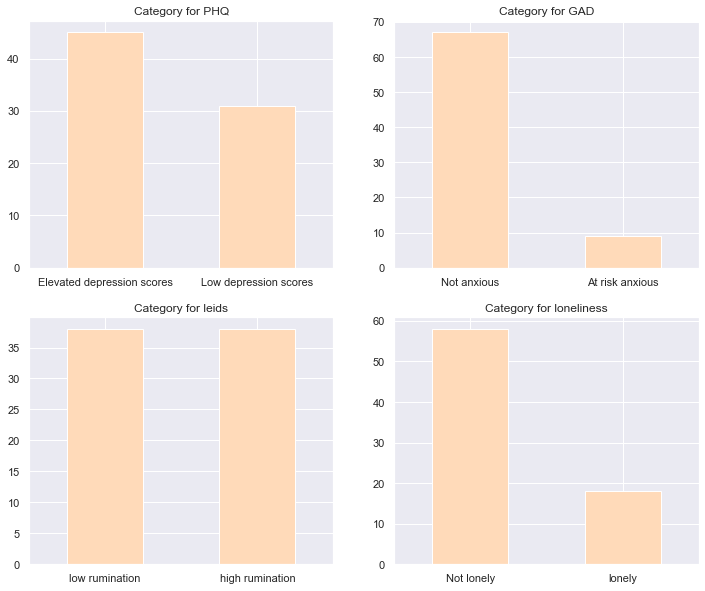

In [14]:
plt.figure(figsize=(12,10))

phq_cat = data_dropnan2.groupby(["ID_DIAMANTE"]).phq_cat.describe().top.value_counts()
#print(phq_cat)
plt.subplot(2,2,1)
phq_cat.plot(kind="bar", rot=0, color="peachpuff")
plt.title("Category for PHQ")

GAD_cat = data_dropnan2.groupby(["ID_DIAMANTE"]).GAD_cat.describe().top.value_counts()
#print(GAD_cat)
plt.subplot(2,2,2)
GAD_cat.plot(kind="bar", rot=0, color="peachpuff")
plt.title("Category for GAD")

leids_cat = data_dropnan2.groupby(["ID_DIAMANTE"]).leids_cat.describe().top.value_counts()
#print(leids_cat)
plt.subplot(2,2,3)
leids_cat.plot(kind="bar", rot=0, color="peachpuff")
plt.title("Category for leids")

lonely_cat = data_dropnan2.groupby(["ID_DIAMANTE"]).lonely_cat.describe().top.value_counts()
#print(lonely_cat)
plt.subplot(2,2,4)
lonely_cat.plot(kind="bar", rot=0, color="peachpuff")
plt.title("Category for loneliness")

### Finding the average today_steps for each feedback messages and motivational messages

feedback
F0    8812.409267
F1    9136.710485
F2    8781.915345
F3    8849.691303
F4    8812.634607
Name: today_steps, dtype: float64
motivational
M0    8914.146397
M1    8905.077426
M2    8723.433406
M3    8886.246028
Name: today_steps, dtype: float64


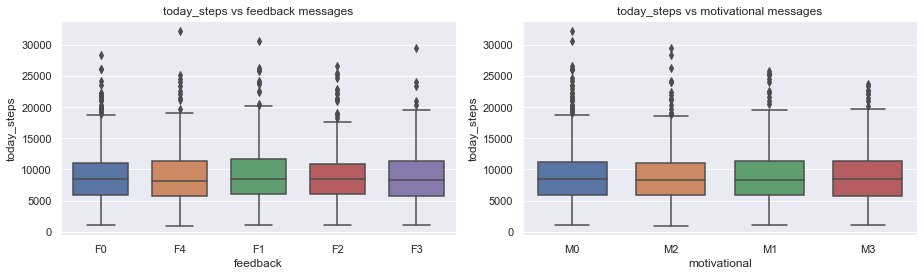

In [15]:
plt.figure(figsize = (13,4))

plt.subplot(1,2,1)
sns.boxplot(x = 'feedback', y = 'today_steps', data = data_dropnan2, width = 0.7)
plt.title("today_steps vs feedback messages")
print(data_dropnan2.groupby(['feedback']).today_steps.mean())

plt.subplot(1,2,2)
sns.boxplot(x = 'motivational', y = 'today_steps', data = data_dropnan2, width = 0.7)
plt.title("today_steps vs motivational messages")
print(data_dropnan2.groupby(['motivational']).today_steps.mean())

plt.tight_layout()

### Now, we look at time of the messaging

time_msg
T0    8793.890402
T1    8370.790623
T2    9057.328237
T3    9162.586892
T4    8949.932880
Name: today_steps, dtype: float64

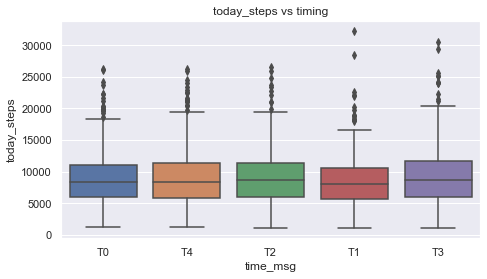

In [16]:
plt.figure(figsize = (7.5,4))
sns.boxplot(x="time_msg", y="today_steps", data=data_dropnan2)  
plt.title("today_steps vs timing")
data_dropnan2.groupby(['time_msg']).today_steps.mean()

### Pair feedback + motivational + timing as different combinations for F0

In [17]:
df_feedback = data_dropnan2.feedback.reset_index().feedback
df_motivational = data_dropnan2.motivational.reset_index().motivational
df_time_msg = data_dropnan2.time_msg.reset_index().time_msg
df_today_steps = data_dropnan2.today_steps.reset_index().today_steps
counts = np.zeros(13)
total_steps = np.zeros(13)
for i in range(len(data_dropnan2)):
    # F0, M0
    if df_feedback.loc[i] == "F0" and df_motivational.loc[i] == "M0":
        counts[0] += 1 
        total_steps[0] += df_today_steps.loc[i]
    
    # F0, M1, T1
    elif df_feedback.loc[i] == "F0" and df_motivational.loc[i] == "M1" and df_time_msg.loc[i] == "T1":
        counts[1] += 1
        total_steps[1] += df_today_steps.loc[i]
        
    # F0, M1, T2
    elif df_feedback.loc[i] == "F0" and df_motivational.loc[i] == "M1" and df_time_msg.loc[i] == "T2":
        counts[2] += 1
        total_steps[2] += df_today_steps.loc[i]
        
    # F0, M1, T3
    elif df_feedback.loc[i] == "F0" and df_motivational.loc[i] == "M1" and df_time_msg.loc[i] == "T3":
        counts[3] += 1
        total_steps[3] += df_today_steps.loc[i]
        
    # F0, M1, T4
    elif df_feedback.loc[i] == "F0" and df_motivational.loc[i] == "M1" and df_time_msg.loc[i] == "T4":
        counts[4] += 1
        total_steps[4] += df_today_steps.loc[i]
        
    # F0, M2, T1
    elif df_feedback.loc[i] == "F0" and df_motivational.loc[i] == "M2" and df_time_msg.loc[i] == "T1":
        counts[5] += 1
        total_steps[5] += df_today_steps.loc[i]
        
    # F0, M2, T2
    elif df_feedback.loc[i] == "F0" and df_motivational.loc[i] == "M2" and df_time_msg.loc[i] == "T2":
        counts[6] += 1
        total_steps[6] += df_today_steps.loc[i]
        
    # F0, M2, T3
    elif df_feedback.loc[i] == "F0" and df_motivational.loc[i] == "M2" and df_time_msg.loc[i] == "T3":
        counts[7] += 1
        total_steps[7] += df_today_steps.loc[i]
        
    # F0, M2, T4
    elif df_feedback.loc[i] == "F0" and df_motivational.loc[i] == "M2" and df_time_msg.loc[i] == "T4":
        counts[8] += 1
        total_steps[8] += df_today_steps.loc[i]   
    
    # F0, M3, T1
    elif df_feedback.loc[i] == "F0" and df_motivational.loc[i] == "M3" and df_time_msg.loc[i] == "T1":
        counts[9] += 1
        total_steps[9] += df_today_steps.loc[i]
        
    # F0, M3, T2
    elif df_feedback.loc[i] == "F0" and df_motivational.loc[i] == "M3" and df_time_msg.loc[i] == "T2":
        counts[10] += 1
        total_steps[10] += df_today_steps.loc[i]
        
    # F0, M3, T3
    elif df_feedback.loc[i] == "F0" and df_motivational.loc[i] == "M3" and df_time_msg.loc[i] == "T3":
        counts[11] += 1
        total_steps[11] += df_today_steps.loc[i]     
    
    # F0, M3, T4
    elif df_feedback.loc[i] == "F0" and df_motivational.loc[i] == "M3" and df_time_msg.loc[i] == "T4":
        counts[12] += 1
        total_steps[12] += df_today_steps.loc[i]
        
print(counts)
counts_F0 = counts
average_F0 = total_steps/counts
print(average_F0)

[604.  23.  28.  25.  15.  27.  25.  28.  26.  30.  32.  32.  30.]
[ 8793.89040238  8304.20170652  9584.11693004  8021.525
 10018.46666667  9236.89481981  9110.63408056  8948.31197536
  8440.23433346  8320.01897083  8158.74198156  9556.17295675
  8872.10143133]


### For F1

In [18]:
df_feedback = data_dropnan2.feedback.reset_index().feedback
df_motivational = data_dropnan2.motivational.reset_index().motivational
df_time_msg = data_dropnan2.time_msg.reset_index().time_msg
df_today_steps = data_dropnan2.today_steps.reset_index().today_steps
counts = np.zeros(16)
total_steps = np.zeros(16)
for i in range(len(data_dropnan2)):
    # F1, M0, T1
    if df_feedback.loc[i] == "F1" and df_motivational.loc[i] == "M0" and df_time_msg.loc[i] == "T1":
        counts[0] += 1 
        total_steps[0] += df_today_steps.loc[i]
    
    # F1, M0, T2
    elif df_feedback.loc[i] == "F1" and df_motivational.loc[i] == "M0" and df_time_msg.loc[i] == "T2":
        counts[1] += 1 
        total_steps[1] += df_today_steps.loc[i]
        
    # F1, M0, T3
    elif df_feedback.loc[i] == "F1" and df_motivational.loc[i] == "M0" and df_time_msg.loc[i] == "T3":
        counts[2] += 1
        total_steps[2] += df_today_steps.loc[i]
        
    # F1, M0, T4
    elif df_feedback.loc[i] == "F1" and df_motivational.loc[i] == "M0" and df_time_msg.loc[i] == "T4":
        counts[3] += 1
        total_steps[3] += df_today_steps.loc[i]
    
    # F1, M1, T1
    elif df_feedback.loc[i] == "F1" and df_motivational.loc[i] == "M1" and df_time_msg.loc[i] == "T1":
        counts[4] += 1
        total_steps[4] += df_today_steps.loc[i]
        
    # F1, M1, T2
    elif df_feedback.loc[i] == "F1" and df_motivational.loc[i] == "M1" and df_time_msg.loc[i] == "T2":
        counts[5] += 1
        total_steps[5] += df_today_steps.loc[i]
        
    # F1, M1, T3
    elif df_feedback.loc[i] == "F1" and df_motivational.loc[i] == "M1" and df_time_msg.loc[i] == "T3":
        counts[6] += 1
        total_steps[6] += df_today_steps.loc[i]
        
    # F1, M2, T4
    elif df_feedback.loc[i] == "F1" and df_motivational.loc[i] == "M1" and df_time_msg.loc[i] == "T4":
        counts[7] += 1
        total_steps[7] += df_today_steps.loc[i]
    
    # F1, M2, T1
    elif df_feedback.loc[i] == "F1" and df_motivational.loc[i] == "M2" and df_time_msg.loc[i] == "T1":
        counts[8] += 1
        total_steps[8] += df_today_steps.loc[i]
        
    # F1, M2, T2
    elif df_feedback.loc[i] == "F1" and df_motivational.loc[i] == "M2" and df_time_msg.loc[i] == "T2":
        counts[9] += 1
        total_steps[9] += df_today_steps.loc[i]
        
    # F1, M2, T3
    elif df_feedback.loc[i] == "F1" and df_motivational.loc[i] == "M2" and df_time_msg.loc[i] == "T3":
        counts[10] += 1
        total_steps[10] += df_today_steps.loc[i]
        
    # F1, M2, T4
    elif df_feedback.loc[i] == "F1" and df_motivational.loc[i] == "M2" and df_time_msg.loc[i] == "T4":
        counts[11] += 1
        total_steps[11] += df_today_steps.loc[i]
        
    # F1, M3, T1
    elif df_feedback.loc[i] == "F1" and df_motivational.loc[i] == "M3" and df_time_msg.loc[i] == "T1":
        counts[12] += 1
        total_steps[12] += df_today_steps.loc[i]   
    
    # F1, M3, T2
    elif df_feedback.loc[i] == "F1" and df_motivational.loc[i] == "M3" and df_time_msg.loc[i] == "T2":
        counts[13] += 1
        total_steps[13] += df_today_steps.loc[i]
        
    # F1, M3, T3
    elif df_feedback.loc[i] == "F1" and df_motivational.loc[i] == "M3" and df_time_msg.loc[i] == "T3":
        counts[14] += 1
        total_steps[14] += df_today_steps.loc[i]
        
    # F1, M3, T4
    elif df_feedback.loc[i] == "F1" and df_motivational.loc[i] == "M3" and df_time_msg.loc[i] == "T4":
        counts[15] += 1
        total_steps[15] += df_today_steps.loc[i]     
        
print(counts)
counts_F1 = counts
average_F1 = total_steps/counts
print(average_F1)

[34. 37. 42. 35. 23. 28. 20. 35. 30. 33. 22. 33. 25. 27. 25. 32.]
[ 7784.23345824 11061.14960916  9781.45909136  8351.63205734
  8171.38338774  8777.59428307 10698.9543945  10263.87582594
  7819.92386133  7902.90655527  8602.67557132 10555.68779073
  8766.70489116  9540.88255667  7758.59207976  9595.22567428]


### For F2

In [19]:
df_feedback = data_dropnan2.feedback.reset_index().feedback
df_motivational = data_dropnan2.motivational.reset_index().motivational
df_time_msg = data_dropnan2.time_msg.reset_index().time_msg
df_today_steps = data_dropnan2.today_steps.reset_index().today_steps
counts = np.zeros(16)
total_steps = np.zeros(16)
for i in range(len(data_dropnan2)):
    # F2, M0, T1
    if df_feedback.loc[i] == "F2" and df_motivational.loc[i] == "M0" and df_time_msg.loc[i] == "T1":
        counts[0] += 1 
        total_steps[0] += df_today_steps.loc[i]
    
    # F2, M0, T2
    elif df_feedback.loc[i] == "F2" and df_motivational.loc[i] == "M0" and df_time_msg.loc[i] == "T2":
        counts[1] += 1 
        total_steps[1] += df_today_steps.loc[i]
        
    # F2, M0, T3
    elif df_feedback.loc[i] == "F2" and df_motivational.loc[i] == "M0" and df_time_msg.loc[i] == "T3":
        counts[2] += 1
        total_steps[2] += df_today_steps.loc[i]
        
    # F2, M0, T4
    elif df_feedback.loc[i] == "F2" and df_motivational.loc[i] == "M0" and df_time_msg.loc[i] == "T4":
        counts[3] += 1
        total_steps[3] += df_today_steps.loc[i]
    
    # F2, M1, T1
    elif df_feedback.loc[i] == "F2" and df_motivational.loc[i] == "M1" and df_time_msg.loc[i] == "T1":
        counts[4] += 1
        total_steps[4] += df_today_steps.loc[i]
        
    # F2, M1, T2
    elif df_feedback.loc[i] == "F2" and df_motivational.loc[i] == "M1" and df_time_msg.loc[i] == "T2":
        counts[5] += 1
        total_steps[5] += df_today_steps.loc[i]
        
    # F2, M1, T3
    elif df_feedback.loc[i] == "F2" and df_motivational.loc[i] == "M1" and df_time_msg.loc[i] == "T3":
        counts[6] += 1
        total_steps[6] += df_today_steps.loc[i]
        
    # F2, M2, T4
    elif df_feedback.loc[i] == "F2" and df_motivational.loc[i] == "M1" and df_time_msg.loc[i] == "T4":
        counts[7] += 1
        total_steps[7] += df_today_steps.loc[i]
    
    # F2, M2, T1
    elif df_feedback.loc[i] == "F2" and df_motivational.loc[i] == "M2" and df_time_msg.loc[i] == "T1":
        counts[8] += 1
        total_steps[8] += df_today_steps.loc[i]
        
    # F2, M2, T2
    elif df_feedback.loc[i] == "F2" and df_motivational.loc[i] == "M2" and df_time_msg.loc[i] == "T2":
        counts[9] += 1
        total_steps[9] += df_today_steps.loc[i]
        
    # F2, M2, T3
    elif df_feedback.loc[i] == "F2" and df_motivational.loc[i] == "M2" and df_time_msg.loc[i] == "T3":
        counts[10] += 1
        total_steps[10] += df_today_steps.loc[i]
        
    # F2, M2, T4
    elif df_feedback.loc[i] == "F2" and df_motivational.loc[i] == "M2" and df_time_msg.loc[i] == "T4":
        counts[11] += 1
        total_steps[11] += df_today_steps.loc[i]
        
    # F2, M3, T1
    elif df_feedback.loc[i] == "F2" and df_motivational.loc[i] == "M3" and df_time_msg.loc[i] == "T1":
        counts[12] += 1
        total_steps[12] += df_today_steps.loc[i]   
    
    # F2, M3, T2
    elif df_feedback.loc[i] == "F2" and df_motivational.loc[i] == "M3" and df_time_msg.loc[i] == "T2":
        counts[13] += 1
        total_steps[13] += df_today_steps.loc[i]
        
    # F2, M3, T3
    elif df_feedback.loc[i] == "F2" and df_motivational.loc[i] == "M3" and df_time_msg.loc[i] == "T3":
        counts[14] += 1
        total_steps[14] += df_today_steps.loc[i]
        
    # F2, M3, T4
    elif df_feedback.loc[i] == "F2" and df_motivational.loc[i] == "M3" and df_time_msg.loc[i] == "T4":
        counts[15] += 1
        total_steps[15] += df_today_steps.loc[i]     
        
print(counts)
counts_F2 = counts
average_F2 = total_steps/counts
print(average_F2)

[39. 24. 36. 41. 32. 31. 26. 30. 29. 35. 29. 28. 29. 36. 32. 19.]
[ 7988.96544672 10903.35624083  8271.66182547  8936.80319115
  7680.29622822  8394.0414749  10338.31717096  8706.38081867
  7736.66794941  8876.38368454  8633.93879152  8278.93734161
  8173.22158286 10528.51299286  8219.79819678  9794.94263947]


### For F3

In [20]:
df_feedback = data_dropnan2.feedback.reset_index().feedback
df_motivational = data_dropnan2.motivational.reset_index().motivational
df_time_msg = data_dropnan2.time_msg.reset_index().time_msg
df_today_steps = data_dropnan2.today_steps.reset_index().today_steps
counts = np.zeros(16)
total_steps = np.zeros(16)
for i in range(len(data_dropnan2)):
    # F3, M0, T1
    if df_feedback.loc[i] == "F3" and df_motivational.loc[i] == "M0" and df_time_msg.loc[i] == "T1":
        counts[0] += 1 
        total_steps[0] += df_today_steps.loc[i]
    
    # F3, M0, T2
    elif df_feedback.loc[i] == "F3" and df_motivational.loc[i] == "M0" and df_time_msg.loc[i] == "T2":
        counts[1] += 1 
        total_steps[1] += df_today_steps.loc[i]
        
    # F3, M0, T3
    elif df_feedback.loc[i] == "F3" and df_motivational.loc[i] == "M0" and df_time_msg.loc[i] == "T3":
        counts[2] += 1
        total_steps[2] += df_today_steps.loc[i]
        
    # F3, M0, T4
    elif df_feedback.loc[i] == "F3" and df_motivational.loc[i] == "M0" and df_time_msg.loc[i] == "T4":
        counts[3] += 1
        total_steps[3] += df_today_steps.loc[i]
    
    # F3, M1, T1
    elif df_feedback.loc[i] == "F3" and df_motivational.loc[i] == "M1" and df_time_msg.loc[i] == "T1":
        counts[4] += 1
        total_steps[4] += df_today_steps.loc[i]
        
    # F3, M1, T2
    elif df_feedback.loc[i] == "F3" and df_motivational.loc[i] == "M1" and df_time_msg.loc[i] == "T2":
        counts[5] += 1
        total_steps[5] += df_today_steps.loc[i]
        
    # F3, M1, T3
    elif df_feedback.loc[i] == "F3" and df_motivational.loc[i] == "M1" and df_time_msg.loc[i] == "T3":
        counts[6] += 1
        total_steps[6] += df_today_steps.loc[i]
        
    # F3, M2, T4
    elif df_feedback.loc[i] == "F3" and df_motivational.loc[i] == "M1" and df_time_msg.loc[i] == "T4":
        counts[7] += 1
        total_steps[7] += df_today_steps.loc[i]
    
    # F3, M2, T1
    elif df_feedback.loc[i] == "F3" and df_motivational.loc[i] == "M2" and df_time_msg.loc[i] == "T1":
        counts[8] += 1
        total_steps[8] += df_today_steps.loc[i]
        
    # F3, M2, T2
    elif df_feedback.loc[i] == "F3" and df_motivational.loc[i] == "M2" and df_time_msg.loc[i] == "T2":
        counts[9] += 1
        total_steps[9] += df_today_steps.loc[i]
        
    # F3, M2, T3
    elif df_feedback.loc[i] == "F3" and df_motivational.loc[i] == "M2" and df_time_msg.loc[i] == "T3":
        counts[10] += 1
        total_steps[10] += df_today_steps.loc[i]
        
    # F3, M2, T4
    elif df_feedback.loc[i] == "F3" and df_motivational.loc[i] == "M2" and df_time_msg.loc[i] == "T4":
        counts[11] += 1
        total_steps[11] += df_today_steps.loc[i]
        
    # F3, M3, T1
    elif df_feedback.loc[i] == "F3" and df_motivational.loc[i] == "M3" and df_time_msg.loc[i] == "T1":
        counts[12] += 1
        total_steps[12] += df_today_steps.loc[i]   
    
    # F3, M3, T2
    elif df_feedback.loc[i] == "F3" and df_motivational.loc[i] == "M3" and df_time_msg.loc[i] == "T2":
        counts[13] += 1
        total_steps[13] += df_today_steps.loc[i]
        
    # F3, M3, T3
    elif df_feedback.loc[i] == "F3" and df_motivational.loc[i] == "M3" and df_time_msg.loc[i] == "T3":
        counts[14] += 1
        total_steps[14] += df_today_steps.loc[i]
        
    # F3, M3, T4
    elif df_feedback.loc[i] == "F3" and df_motivational.loc[i] == "M3" and df_time_msg.loc[i] == "T4":
        counts[15] += 1
        total_steps[15] += df_today_steps.loc[i]     
        
print(counts)
counts_F3 = counts
average_F3 = total_steps/counts
print(average_F3)

[27. 36. 26. 25. 25. 24. 26. 29. 29. 24. 33. 32. 26. 33. 36. 34.]
[ 9391.72168037  9576.94106225  9359.84615385  8952.6439276
  6929.4018948   9058.30895046  8489.96850146  8023.78605603
  7714.35775862 10067.08333333 10266.32755321  8243.26953125
  9617.97454431  7742.00355733  9138.98770833  8913.75685829]


### For F4

In [21]:
df_feedback = data_dropnan2.feedback.reset_index().feedback
df_motivational = data_dropnan2.motivational.reset_index().motivational
df_time_msg = data_dropnan2.time_msg.reset_index().time_msg
df_today_steps = data_dropnan2.today_steps.reset_index().today_steps
counts = np.zeros(16)
total_steps = np.zeros(16)
for i in range(len(data_dropnan2)):
    # F4, M0, T1
    if df_feedback.loc[i] == "F4" and df_motivational.loc[i] == "M0" and df_time_msg.loc[i] == "T1":
        counts[0] += 1 
        total_steps[0] += df_today_steps.loc[i]
    
    # F4, M0, T2
    elif df_feedback.loc[i] == "F4" and df_motivational.loc[i] == "M0" and df_time_msg.loc[i] == "T2":
        counts[1] += 1 
        total_steps[1] += df_today_steps.loc[i]
        
    # F4, M0, T3
    elif df_feedback.loc[i] == "F4" and df_motivational.loc[i] == "M0" and df_time_msg.loc[i] == "T3":
        counts[2] += 1
        total_steps[2] += df_today_steps.loc[i]
        
    # F4, M0, T4
    elif df_feedback.loc[i] == "F4" and df_motivational.loc[i] == "M0" and df_time_msg.loc[i] == "T4":
        counts[3] += 1
        total_steps[3] += df_today_steps.loc[i]
    
    # F4, M1, T1
    elif df_feedback.loc[i] == "F4" and df_motivational.loc[i] == "M1" and df_time_msg.loc[i] == "T1":
        counts[4] += 1
        total_steps[4] += df_today_steps.loc[i]
        
    # F4, M1, T2
    elif df_feedback.loc[i] == "F4" and df_motivational.loc[i] == "M1" and df_time_msg.loc[i] == "T2":
        counts[5] += 1
        total_steps[5] += df_today_steps.loc[i]
        
    # F4, M1, T3
    elif df_feedback.loc[i] == "F4" and df_motivational.loc[i] == "M1" and df_time_msg.loc[i] == "T3":
        counts[6] += 1
        total_steps[6] += df_today_steps.loc[i]
        
    # F4, M2, T4
    elif df_feedback.loc[i] == "F4" and df_motivational.loc[i] == "M1" and df_time_msg.loc[i] == "T4":
        counts[7] += 1
        total_steps[7] += df_today_steps.loc[i]
    
    # F4, M2, T1
    elif df_feedback.loc[i] == "F4" and df_motivational.loc[i] == "M2" and df_time_msg.loc[i] == "T1":
        counts[8] += 1
        total_steps[8] += df_today_steps.loc[i]
        
    # F4, M2, T2
    elif df_feedback.loc[i] == "F4" and df_motivational.loc[i] == "M2" and df_time_msg.loc[i] == "T2":
        counts[9] += 1
        total_steps[9] += df_today_steps.loc[i]
        
    # F4, M2, T3
    elif df_feedback.loc[i] == "F4" and df_motivational.loc[i] == "M2" and df_time_msg.loc[i] == "T3":
        counts[10] += 1
        total_steps[10] += df_today_steps.loc[i]
        
    # F4, M2, T4
    elif df_feedback.loc[i] == "F4" and df_motivational.loc[i] == "M2" and df_time_msg.loc[i] == "T4":
        counts[11] += 1
        total_steps[11] += df_today_steps.loc[i]
        
    # F4, M3, T1
    elif df_feedback.loc[i] == "F4" and df_motivational.loc[i] == "M3" and df_time_msg.loc[i] == "T1":
        counts[12] += 1
        total_steps[12] += df_today_steps.loc[i]   
    
    # F4, M3, T2
    elif df_feedback.loc[i] == "F4" and df_motivational.loc[i] == "M3" and df_time_msg.loc[i] == "T2":
        counts[13] += 1
        total_steps[13] += df_today_steps.loc[i]
        
    # F4, M3, T3
    elif df_feedback.loc[i] == "F4" and df_motivational.loc[i] == "M3" and df_time_msg.loc[i] == "T3":
        counts[14] += 1
        total_steps[14] += df_today_steps.loc[i]
        
    # F4, M3, T4
    elif df_feedback.loc[i] == "F4" and df_motivational.loc[i] == "M3" and df_time_msg.loc[i] == "T4":
        counts[15] += 1
        total_steps[15] += df_today_steps.loc[i]     
        
print(counts)
counts_F4 = counts
average_F4 = total_steps/counts
print(average_F4)

[37. 37. 41. 42. 25. 23. 23. 25. 27. 38. 29. 14. 30. 21. 26. 27.]
[ 9635.66998214  8148.83045341  8892.88029393  8404.65596821
 10035.183402    9116.65330361  9728.7826087   8542.52911648
  7829.04877037  7790.54748763  9873.81621793  8716.61228571
  8145.10477413  8193.53626557  9694.47384523  8892.03726444]


### Different combinations counts and average steps

|Combinations|Counts|Average steps|Combinations|Counts|Average steps|Combinations|Counts|Average steps|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|F0, M0|604|8793.89|F1, M0, T1|34|7784.23|F2, M0, T1|39|7988.97|
|F0, M1, T1|23|8304.20|F1, M0, T2|37|11061.15|F2, M0, T2|24|10903.36|
|F0, M1, T2|28|9584.12|F1, M0, T3|42|9781.46|F2, M0, T3|36|8271.66|
|F0, M1, T3|25|8021.53|F1, M0, T4|35|8351.63|F2, M0, T4|41|8936.80|
|F0, M1, T4|15|10018.47|F1, M1, T1|23|8171.38|F2, M1, T1|32|7680.30|
|F0, M2, T1|27|9236.89|F1, M1, T2|28|8777.59|F2, M1, T2|31|8394.04|
|F0, M2, T2|25|9110.63|F1, M1, T3|20|10698.95|F2, M1, T3|26|10338.32|
|F0, M2, T3|38|8948.31|F1, M1, T4|35|10263.88|F2, M1, T4|30|8706.38|
|F0, M2, T4|26|8440.23|F1, M2, T1|30|7819.92|F2, M2, T1|29|7736.67|
|F0, M3, T1|30|8320.02|F1, M2, T2|33|7902.91|F2, M2, T2|35|8876.38|
|F0, M3, T2|32|8158.74|F1, M2, T3|22|8602.68|F2, M2, T3|29|8633.94|
|F0, M3, T3|32|9556.17|F1, M2, T4|33|10555.69|F2, M2, T4|28|8278.94|
|F0, M3, T4|30|8872.10|F1, M3, T1|25|8766.70|F2, M3, T1|29|8173.22|
||||F1, M3, T2|27|9540.88|F2, M3, T2|36|10528.51|
||||F1, M3, T3|25|7758.59|F2, M3, T3|32|8219.80|
||||F1, M3, T2|32|9595.23|F2, M3, T4|19|9794.94|

|Combinations|Counts|Average steps|Combinations|Counts|Average steps|
|:-:|:-:|:-:|:-:|:-:|:-:|
|F3, M0, T1|27|9391.72|F4, M0, T1|37|9635.67|
|F3, M0, T2|36|9576.94|F4, M0, T2|37|8418.83|
|F3, M0, T3|26|9359.85|F4, M0, T3|41|8892.88|
|F3, M0, T4|25|8952.64|F4, M0, T4|42|8404.66|
|F3, M1, T1|25|6929.40|F4, M1, T1|25|10035.18|
|F3, M1, T2|24|9058.31|F4, M1, T2|23|9116.65|
|F3, M1, T3|26|8489.97|F4, M1, T3|23|9728.78|
|F3, M1, T4|29|8023.79|F4, M1, T4|25|8542.53|
|F3, M2, T1|29|7714.36|F4, M2, T1|27|7829.05|
|F3, M2, T2|24|10067.08|F4, M2, T2|38|7790.55|
|F3, M2, T3|33|10266.33|F4, M2, T3|29|9873.82|
|F3, M2, T4|32|8243.27|F4, M2, T4|14|8716.61|
|F3, M3, T1|26|9617.97|F4, M3, T1|30|8145.10|
|F3, M3, T2|33|7742.00|F4, M3, T2|21|8193.54|
|F3, M3, T3|36|9138.99|F4, M3, T3|26|9649.48|
|F3, M3, T4|34|8913.76|F4, M3, T4|27|8892.04|

### Plot of average steps for the different combinations

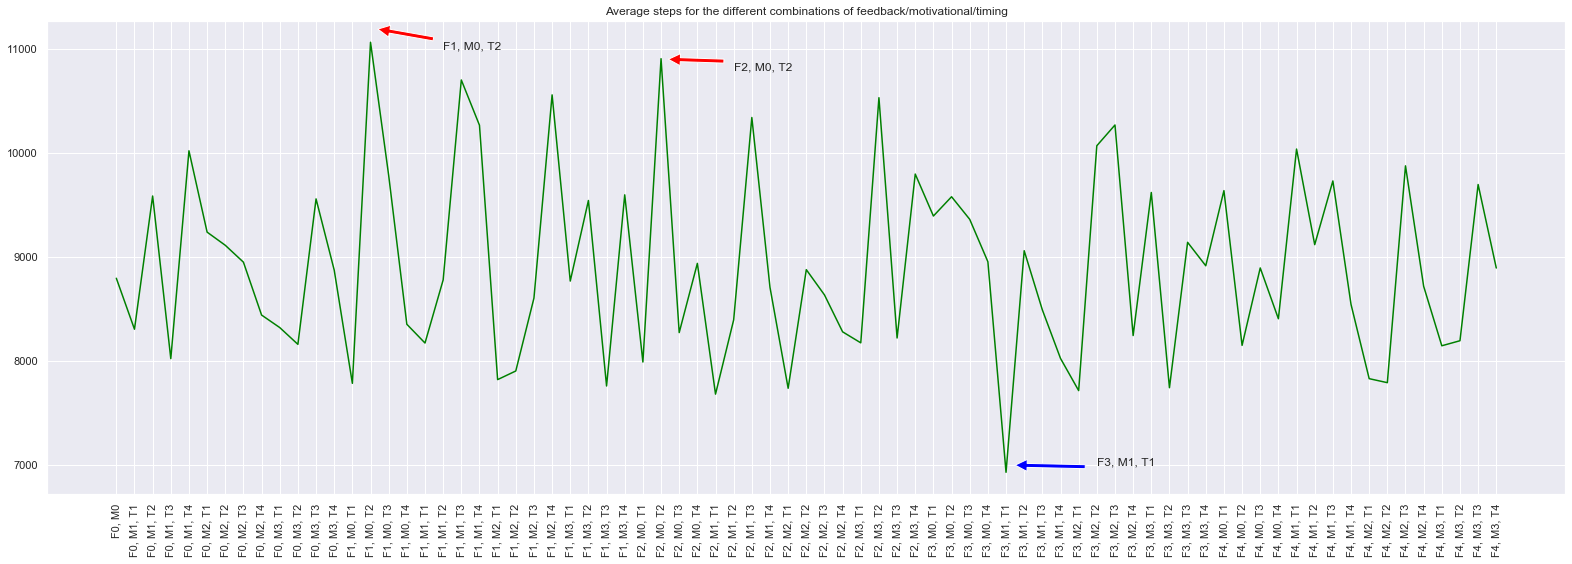

In [22]:
labels = ("F0, M0", "F0, M1, T1", "F0, M1, T2", "F0, M1, T3", "F0, M1, T4", "F0, M2, T1", "F0, M2, T2", "F0, M2, T3"
          ,"F0, M2, T4","F0, M3, T1","F0, M3, T2","F0, M3, T3","F0, M3, T4",
          
          "F1, M0, T1", "F1, M0, T2","F1, M0, T3","F1, M0, T4","F1, M1, T1","F1, M1, T2","F1, M1, T3","F1, M1, T4",
          "F1, M2, T1", "F1, M2, T2","F1, M2, T3","F1, M2, T4","F1, M3, T1","F1, M3, T2","F1, M3, T3","F1, M3, T4",
          
          "F2, M0, T1","F2, M0, T2","F2, M0, T3","F2, M0, T4", "F2, M1, T1","F2, M1, T2","F2, M1, T3","F2, M1, T4",
          "F2, M2, T1","F2, M2, T2","F2, M2, T3","F2, M2, T4","F2, M3, T1","F2, M3, T2","F2, M3, T3","F2, M3, T4",
          
          "F3, M0, T1","F3, M0, T2","F3, M0, T3","F3, M0, T4", "F3, M1, T1","F3, M1, T2","F3, M1, T3","F3, M1, T4",
          "F3, M2, T1","F3, M2, T2","F3, M2, T3","F3, M2, T4","F3, M3, T1","F3, M3, T2","F3, M3, T3","F3, M3, T4",         
          
          "F4, M0, T1","F4, M0, T2","F4, M0, T3","F4, M0, T4","F4, M1, T1","F4, M1, T2","F4, M1, T3","F4, M1, T4",
          "F4, M2, T1","F4, M2, T2","F4, M2, T3","F4, M2, T4","F4, M3, T1","F4, M3, T2","F4, M3, T3","F4, M3, T4")

average = np.concatenate((average_F0, average_F1, average_F2, average_F3, average_F4))
plt.figure(figsize = (22,8))
plt.plot(labels,average,color="green")
plt.xticks(rotation=90)
plt.title("Average steps for the different combinations of feedback/motivational/timing")
plt.tight_layout()

# Circling the obvious best and worst performers
# annotate(text, arrow's tip coordinates, text coordinates, arrow-size-color)
plt.annotate("F1, M0, T2", xy=("F1, M0, T2",11200), xytext=(18,11000), arrowprops=dict(facecolor="red", shrink=0.1))
plt.annotate("F2, M0, T2", xy=("F2, M0, T2",10900), xytext=(34,10800), arrowprops=dict(facecolor="red", shrink=0.1))
plt.annotate("F3, M1, T1", xy=("F3, M1, T1",7000), xytext=(54,7000), arrowprops=dict(facecolor="blue", shrink=0.1))

plt.show()

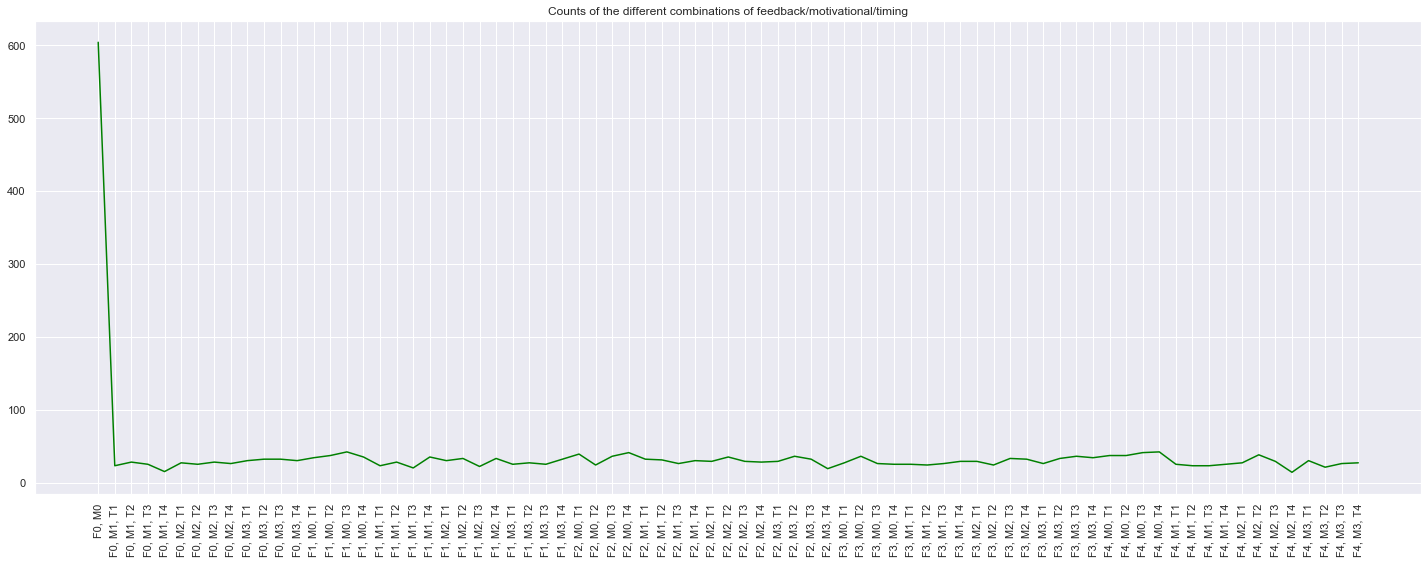

In [23]:
counts = np.concatenate((counts_F0, counts_F1, counts_F2, counts_F3, counts_F4))
plt.figure(figsize = (20,8))
plt.plot(labels,counts,color="green")
plt.xticks(rotation=90)
plt.title("Counts of the different combinations of feedback/motivational/timing")
plt.tight_layout()

### Number of feedback messages received per/week

C:\Users\Kiat Kai\Documents\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


[array([242.,  58.,  62.,  52.,  69.]), array([154.,  87.,  85.,  94.,  80.]), array([169.,  77.,  80.,  82.,  64.]), array([ 98., 108.,  81.,  87.,  93.]), array([ 88.,  71., 103.,  69.,  85.]), array([127.,  62.,  62.,  60.,  55.])]
[array([9330.78522788, 9449.50461914, 8879.83243055, 9609.59965444,
       8384.85445772]), array([8728.01464118, 9538.2083566 , 8821.3914842 , 8779.83251756,
       8625.70495373]), array([8116.91747185, 9354.93766661, 8599.0383734 , 8325.11108629,
       8305.85834325]), array([9238.16884513, 9776.2224211 , 8184.33427525, 9482.46063008,
       8856.42098442]), array([8307.58884087, 7872.69588024, 9444.79101189, 8464.14054512,
       9824.59995992]), array([8785.15424039, 8382.13054956, 8885.66411242, 8420.92342667,
       8516.90759424])]


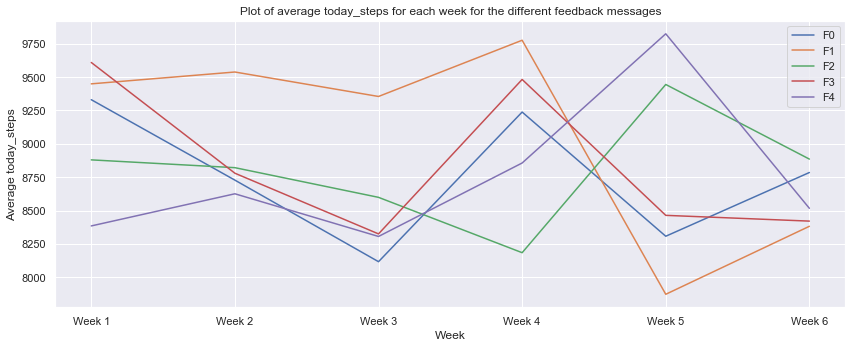

In [24]:
weekly_feedback_count = []
weekly_feedback_average = []
daily_feedback_count = np.zeros(5)
daily_feedback_average = np.zeros(5)
total_today_steps_feedback = np.zeros(5)

for day in range(1,46):
    feedback_list = ["F0", "F1", "F2", "F3", "F4"]
    data_dropnan2_day = data_dropnan2[data_dropnan2["Study_Day"]==day]
    index = 0
    for i in feedback_list:
        count_feedback = data_dropnan2_day[data_dropnan2_day["feedback"] == i].today_steps.count()
        total_today_steps_feedback[index] += data_dropnan2_day[data_dropnan2_day["feedback"] == i].today_steps.sum()
        daily_feedback_count[index] += count_feedback
        mean_feedback = total_today_steps_feedback[index]/daily_feedback_count[index]
        daily_feedback_average[index] = mean_feedback
        index += 1
        #print("Number of feedback messages: " + str(i) + " for day " + str(day) + " is "+ str(count_feedback) 
        #      + " and mean today_steps is " + str(mean_feedback))
    if day % 7 == 0:
        weekly_feedback_count.append(daily_feedback_count)
        weekly_feedback_average.append(daily_feedback_average)
        daily_feedback_count = np.zeros(5)
        daily_feedback_average = np.zeros(5)
        total_today_steps_feedback = np.zeros(5)
        
print((weekly_feedback_count)) 
print(weekly_feedback_average)

plt.figure(figsize=(12,5))

labels_week = ["Week 1", "Week 2", "Week 3", "Week 4", "Week 5", "Week 6"]
for i in range(0,5):
    average_each_week = []
    for week in range(0,6):
        average_each_week.append(weekly_feedback_average[week][i])
    plt.plot(labels_week,average_each_week, label = "F" + str(i))
plt.xlabel("Week")
plt.ylabel("Average today_steps")
plt.title("Plot of average today_steps for each week for the different feedback messages")
plt.legend(loc="upper right")
plt.tight_layout()

|Feedback messages|Average today_steps(week 1)|Counts(week 1)|Average today_steps(week 2)|Counts(week 2)|Average today_steps(week 3)|Counts(week 3)|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|F0|9331|242|8728|154|8117|169|
|F1|9450|58|9538|87|9355|77|
|F2|8880|62|8821|85|8599|80|
|F3|9610|52|8780|94|8325|82|
|F4|8385|69|8626|80|8306|64|

|Feedback messages|Average today_steps(week 4)|Counts(week 4)|Average today_steps(week 5)|Counts(week 5)|Average today_steps(week 6)|Counts(week 6)|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|F0|9238|98|8308|88|8785|127|
|F1|9776|108|7873|71|8382|62|
|F2|8184|81|9445|103|8886|62|
|F3|9482|87|8464|69|8421|60|
|F4|8856|93|9825|85|8517|55|

### Number of motivational messages received per/week

C:\Users\Kiat Kai\Documents\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


[array([249.,  80.,  77.,  77.]), array([173., 102., 119., 106.]), array([220.,  84.,  66., 102.]), array([184.,  73., 115.,  95.]), array([128.,  86.,  98., 104.]), array([159.,  68.,  80.,  59.])]
[array([9434.77059218, 9434.21413718, 8477.73440783, 8807.0712407 ]), array([9061.70019749, 8708.81346068, 8598.31592108, 9056.081218  ]), array([8423.83371388, 8724.52362352, 8805.92666223, 8107.37063579]), array([9220.65397574, 9327.16781332, 9132.15601573, 8895.19312892]), array([9133.00664917, 8242.26608042, 8650.78303572, 9195.41271552]), array([8108.70678232, 9080.24276625, 8923.12145209, 9142.58607108])]


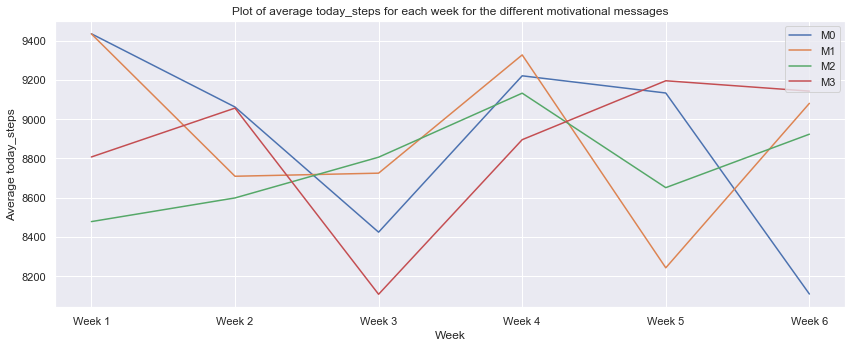

In [25]:
weekly_motivational_count = []
weekly_motivational_average = []
daily_motivational_count = np.zeros(4)
daily_motivational_average = np.zeros(4)
total_today_steps_motivational = np.zeros(4)

for day in range(1,46):
    motivational_list = ["M0", "M1", "M2", "M3"]
    data_dropnan2_day = data_dropnan2[data_dropnan2["Study_Day"]==day]
    index = 0
    for i in motivational_list:
        count_motivational = data_dropnan2_day[data_dropnan2_day["motivational"] == i].today_steps.count()
        total_today_steps_motivational[index] += data_dropnan2_day[data_dropnan2_day["motivational"] == i].today_steps.sum()
        daily_motivational_count[index] += count_motivational
        mean_motivational = total_today_steps_motivational[index]/daily_motivational_count[index]
        daily_motivational_average[index] = mean_motivational
        index += 1
        #print("Number of motivational messages: " + str(i) + " for day " + str(day) + " is "+ str(count_motivational) 
        #      + " and mean today_steps is " + str(mean_motivational))
    if day % 7 == 0:
        weekly_motivational_count.append(daily_motivational_count)
        weekly_motivational_average.append(daily_motivational_average)
        daily_motivational_count = np.zeros(4)
        daily_motivational_average = np.zeros(4)
        total_today_steps_motivational = np.zeros(4)

print(weekly_motivational_count)
print(weekly_motivational_average)

plt.figure(figsize=(12,5))

labels_week = ["Week 1", "Week 2", "Week 3", "Week 4", "Week 5", "Week 6"]
for i in range(0,4):
    average_each_week = []
    for week in range(0,6):
        average_each_week.append(weekly_motivational_average[week][i])
    plt.plot(labels_week,average_each_week, label = "M" + str(i))
plt.xlabel("Week")
plt.ylabel("Average today_steps")
plt.title("Plot of average today_steps for each week for the different motivational messages")
plt.legend(loc="upper right")
plt.tight_layout()

|Motivational messages|Average today_steps(week 1)|Counts(week 1)|Average today_steps(week 2)|Counts(week 2)|Average today_steps(week 3)|Counts(week 3)|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|M0|9435|249|9062|173|8424|220|
|M1|9434|80|8709|102|8725|84|
|M2|8478|77|8598|119|8806|66|
|M3|8807|77|9056|106|8107|102|

|Motivational messages|Average today_steps(week 4)|Counts(week 4)|Average today_steps(week 5)|Counts(week 5)|Average today_steps(week 6)|Counts(week 6)|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|M0|9221|184|9133|128|8109|159|
|M1|9327|73|8242|86|9080|68|
|M2|9132|115|8651|98|8923|80|
|M3|8895|95|9195|104|9143|59|


### Number of messages sent at different timing each week

C:\Users\Kiat Kai\Documents\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


[array([81., 60., 69., 78.]), array([100., 109., 107., 103.]), array([ 77., 101.,  94.,  79.]), array([100., 104., 103., 103.]), array([ 99., 101.,  97.,  92.]), array([69., 77., 61., 67.])]
[array([8570.52648579, 9464.06145653, 9430.73875358, 8779.51293482]), array([7938.41934919, 9178.24669132, 9554.14414904, 8929.61938447]), array([8434.75910505, 8598.18798764, 8744.88827639, 8359.12180624]), array([8517.16027944, 8796.57378694, 9764.01440227, 9394.73359282]), array([8771.12203877, 8982.76549468, 8985.90711486, 8836.87420982]), array([8076.87433991, 9529.82436414, 8594.1940959 , 8903.60087721])]


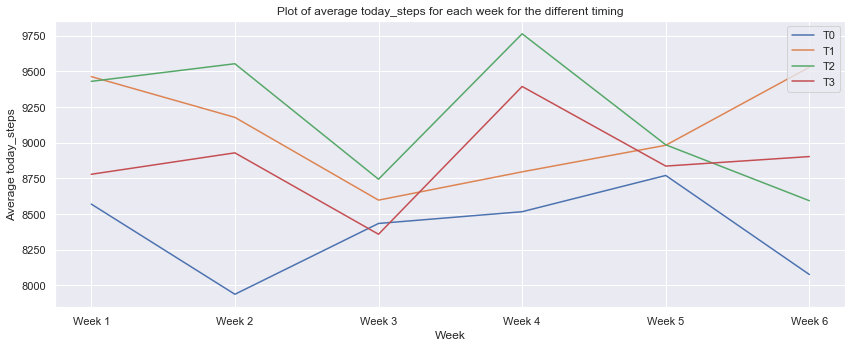

In [26]:
weekly_timemsg_count = []
weekly_timemsg_average = []
daily_timemsg_count = np.zeros(4)
daily_timemsg_average = np.zeros(4)
total_today_steps_timemsg = np.zeros(4)

for day in range(1,46):
    timemsg_list = ["T1", "T2", "T3", "T4"]
    data_dropnan2_day = data_dropnan2[data_dropnan2["Study_Day"]==day]
    index = 0
    for i in timemsg_list:
        count_timemsg = data_dropnan2_day[data_dropnan2_day["time_msg"] == i].today_steps.count()
        total_today_steps_timemsg[index] += data_dropnan2_day[data_dropnan2_day["time_msg"] == i].today_steps.sum()
        daily_timemsg_count[index] += count_timemsg
        mean_timemsg = total_today_steps_timemsg[index]/daily_timemsg_count[index]
        daily_timemsg_average[index] = mean_timemsg
        index += 1
        #print("Number of timemsg messages: " + str(i) + " for day " + str(day) + " is "+ str(count_timemsg) 
        #      + " and mean today_steps is " + str(mean_timemsg))
    if day % 7 == 0:
        weekly_timemsg_count.append(daily_timemsg_count)
        weekly_timemsg_average.append(daily_timemsg_average)
        daily_timemsg_count = np.zeros(4)
        daily_timemsg_average = np.zeros(4)
        total_today_steps_timemsg = np.zeros(4)

print((weekly_timemsg_count))
print(weekly_timemsg_average)

plt.figure(figsize=(12,5))

labels_week = ["Week 1", "Week 2", "Week 3", "Week 4", "Week 5", "Week 6"]
for i in range(0,4):
    average_each_week = []
    for week in range(0,6):
        average_each_week.append(weekly_timemsg_average[week][i])
    plt.plot(labels_week,average_each_week, label = "T" + str(i))
    
plt.xlabel("Week")
plt.ylabel("Average today_steps")
plt.title("Plot of average today_steps for each week for the different timing")
plt.legend(loc="upper right")
plt.tight_layout()

|Timing|Average today_steps(week 1)|Counts(week 1)|Average today_steps(week 2)|Counts(week 2)|Average today_steps(week 3)|Counts(week 3)|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|T1|8571|81|7938|100|8435|77|
|T2|9464|60|9178|109|8598|101|
|T3|9431|69|9554|107|8745|94|
|T4|8780|78|8930|103|8359|79|

|Timing|Average today_steps(week 4)|Counts(week 4)|Average today_steps(week 5)|Counts(week 5)|Average today_steps(week 6)|Counts(week 6)|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|T1|8517|100|8771|99|8077|69|
|T2|8796|104|8983|101|9530|77|
|T3|9764|103|8986|97|8594|61|
|T4|9895|103|8837|92|8904|67|

### Difference between the last day today_steps and the first day (baseline) today_steps for each participant

0.0    59
1.0    25
dtype: int64


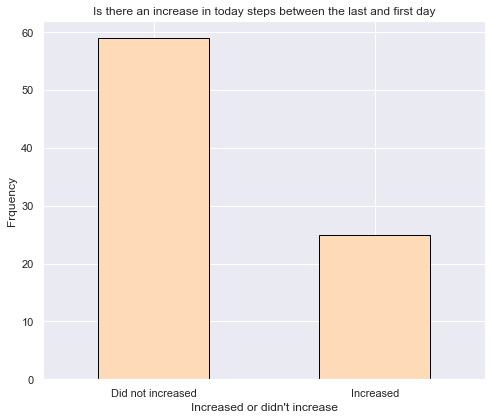

In [27]:
df1_participants = data_dropnan2.ID_DIAMANTE.unique() # 84 participants with different id
diff = []
increase = np.zeros(84) # To store whether there are increase for each participants, 1 if yes, 0 if no
index = 0
for participant in df1_participants:
    # print(df1[df1["ID_DIAMANTE"] == participant].reset_index().today_steps[0::len(df1[df1["ID_DIAMANTE"] == participant])-1])
    
    # To get the difference between the last and first day of each participant
    difference = data_dropnan2[data_dropnan2["ID_DIAMANTE"] == participant].reset_index().today_steps[len(data_dropnan2[data_dropnan2["ID_DIAMANTE"] == participant])-1] - data_dropnan2[data_dropnan2["ID_DIAMANTE"] == participant].reset_index().today_steps[0]
    diff.append(difference)
    if difference > 0:
        increase[index] = 1
    index += 1

plt.figure(figsize=(7,6))
increase_or_decrease_dict = {0:"Did not increased", 1:"Increased"}
pd.Series(increase).value_counts().rename(increase_or_decrease_dict).plot(kind="bar", rot = 0, ec = "black", color = "peachpuff")
plt.xlabel("Increased or didn't increase")
plt.ylabel("Frquency")
plt.title("Is there an increase in today steps between the last and first day")
plt.tight_layout()
print(pd.Series(increase).value_counts())


### Distribution of different arm group

0.0    55
1.0    21
Name: max, dtype: int64


Text(0.5, 1.0, 'Distribution of different arm group')

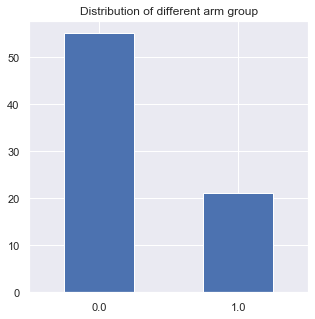

In [28]:
plt.figure(figsize=(5,5))
print(data_dropnan2.groupby(["ID_DIAMANTE"]).arm.describe()['max'].value_counts()) 
data_dropnan2.groupby(["ID_DIAMANTE"]).arm.describe()['max'].value_counts().plot(kind='bar', rot=0)
plt.title("Distribution of different arm group")

arm
0    9095.61693
1    8272.42093
Name: today_steps, dtype: float64

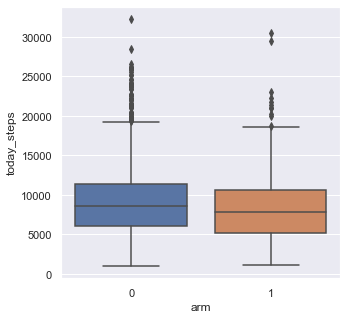

In [29]:
plt.figure(figsize=(5,5))
sns.boxplot(x="arm", y="today_steps", data=data_dropnan2)  
# adaptive and uniform group seems to have roughly about the same average today_steps
data_dropnan2.groupby(['arm']).today_steps.mean()

### Difference between the last day of each week today_steps and the first day (baseline) today_steps for each participant

In [30]:
df_participants = data_dropnan2.ID_DIAMANTE.unique() # 76 participants with different id
weekly_goals = []  # To store all the weekly goals for each participants every 7th day
weekly_steps = []  # To store all the weekly steps for each participants every 7th day

##########################################################################################
########### To store all the daily_goals for each week for each participants #############
##########################################################################################

for participant in df_participants:
    week = 0
    individual_weekly_goals = np.zeros(7)              # To record the weekly goals for each participants
    
    # study days the participants have after removing NA's
    study_days = list(data_dropnan2[data_dropnan2["ID_DIAMANTE"] == participant].Study_Day) 
    
    #print(participant)
    
    for day in study_days:
        index = study_days.index(day)
        df_participant_dailygoal = data_dropnan2[data_dropnan2["ID_DIAMANTE"] == participant].daily_goal.reset_index().drop(["index"],axis=1)
        
        if day % 7 == 0:
            individual_weekly_goals[week] += df_participant_dailygoal.loc[index]
            #print(individual_weekly_goals)
            week += 1
        else:
            individual_weekly_goals[week] += df_participant_dailygoal.loc[index]
    
    weekly_goals.append(individual_weekly_goals)   

#print(weekly_goals)

##########################################################################################
########### To store all the today_steps for each week for each participants #############
##########################################################################################

for participant in df_participants:
    week = 0
    individual_weekly_steps = np.zeros(7)              # To record the weekly steps for each participants
    
    # study days the participants have after removing NA's
    study_days = list(data_dropnan2[data_dropnan2["ID_DIAMANTE"] == participant].Study_Day) 
    
    #print(participant)
    
    for day in study_days:
        index = study_days.index(day)
        df_participant_todaystep = data_dropnan2[data_dropnan2["ID_DIAMANTE"] == participant].today_steps.reset_index().drop(["index"],axis=1)
        
        if day % 7 == 0:
            individual_weekly_steps[week] += df_participant_todaystep.loc[index]
            #print(individual_weekly_steps)
            week += 1
        else:
            individual_weekly_steps[week] += df_participant_todaystep.loc[index]
    
    weekly_steps.append(individual_weekly_steps)   

#print(weekly_steps)

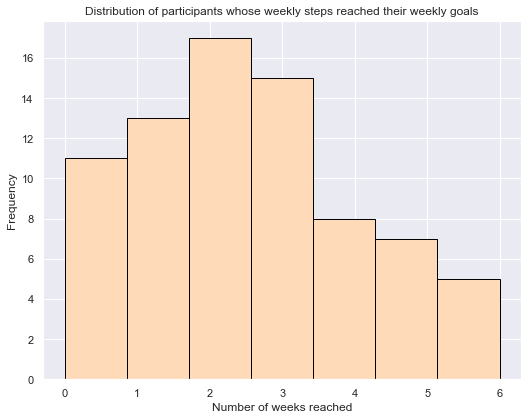

In [31]:
##########################################################################################
############ To compare weekly_steps vs weekly_goals for each participants ###############
##########################################################################################

weekly_target_hit = []
weekly_target_hit_count = np.zeros(76)

for i in range(76):
    indiv_weekly_target_hit = np.zeros(6) 
    
    for week in range(6):  # 45 days is 6 weeks plus 3 days 
        
        if weekly_steps[i][week] >= weekly_goals[i][week]:   
            indiv_weekly_target_hit[week] = 1       # if their weekly_step hit their weekly_goal, then 1
            weekly_target_hit_count[i] += 1
        else:
            indiv_weekly_target_hit[week] = 0       # if their weekly_step hit their weekly_goal, then 0
            
    weekly_target_hit.append(indiv_weekly_target_hit)

#print(weekly_target_hit)

#### Distribution of weekly goals ####
plt.figure(figsize=(7.5,6))
plt.hist(weekly_target_hit_count, ec = "black", bins = 7, color = "peachpuff")
plt.ylabel("Frequency")
plt.xlabel("Number of weeks reached")
plt.title("Distribution of participants whose weekly steps reached their weekly goals")
plt.tight_layout()

### Distribution of weekly goals for participants

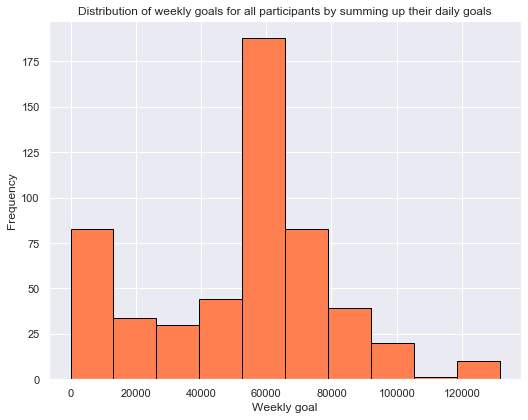

In [32]:
#### Distribution of weekly goals ####
plt.figure(figsize=(7.5,6))
plt.hist(np.concatenate(weekly_goals), ec = "black", color = "coral")
plt.ylabel("Frequency")
plt.xlabel("Weekly goal")
plt.title("Distribution of weekly goals for all participants by summing up their daily goals")
plt.tight_layout()

In [33]:
df1_participants = data_dropnan2.ID_DIAMANTE.unique() # 84 participants with different id
weekly_num_of_increase = []  # To store the number of increase/decrease each week for each participant
dist_week_increase = []

# WE exlude the last 3 days, include first 6 weeks: 42 days
for participant in df1_participants:
    week = 0
    individual_weekly_num_of_increase = np.zeros(6)              # To record the weekly increase/decrease for each participants
    total_num_week_increase = 0
    for day in range(data_dropnan2[data_dropnan2["ID_DIAMANTE"] == participant].Study_Day.max()):  # range of the max+1 of the study day for each participant
        
        if data_dropnan2[data_dropnan2["ID_DIAMANTE"] == participant].Study_Day.iloc[day] % 7 == 0:
            if data_dropnan2[data_dropnan2["ID_DIAMANTE"] == participant].today_steps.iloc[day] - data_dropnan2[data_dropnan2["ID_DIAMANTE"] == participant].today_steps.iloc[day-6] > 0:
                individual_weekly_num_of_increase[week] = 1
                week += 1
                total_num_week_increase += 1
            else:
                individual_weekly_num_of_increase[week] = 0
                week += 1       
    dist_week_increase.append(total_num_week_increase)
    weekly_num_of_increase.append(individual_weekly_num_of_increase)

plt.figure(figsize = (8,6))
plt.hist(dist_week_increase, color = "peachpuff", ec = "black", bins = 6, align = "mid")
plt.ylabel("Frequency")
plt.xlabel("Number of weeks")
plt.title("Number of increase between the 1st and last day of each week for entire duration (6 weeks)")
plt.tight_layout()



IndexError: single positional indexer is out-of-bounds